In [2]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
from statsmodels.stats.libqsturng import psturng
import scipy.stats as stats
import warnings

!pip install scikit-posthocs
import scikit_posthocs as sp

warnings.filterwarnings("ignore")
pd.set_option('max_columns', None)
sns.set_style("whitegrid")

# Determining evolutionary context of genes

In [25]:
species_list = ['celeste', 'magna', 'natalis']
DEG_dict = {}

for s in species_list:
    
    s_df_name = 'df_' + str(s) #create dataframe for this iteration
    data = pd.read_csv(str(s) + "_ogs.csv") #read in cleaned file of ogs per spp
    data = data.set_index('orthogroup').T #set index column to 'orthogroup', then transpose df
    data.reset_index(drop=True, inplace=True) #reset index

    #save file to remove index row upon reread
    data.to_csv(str(s) +'_ogs_edit.csv', index=False)
    og_df = pd.read_csv(str(s) +'_ogs_edit.csv', index_col=False)
    
    #create species OG:TX dictionaries
    species_og_dict = {i:list(og_df[i]) for i in og_df.columns}
    
    species_dict = {}
    
    for i,j in species_og_dict.items():
        species_dict[i] = " ".join([str(k) for k in j]) # aka dm_dict
    #end up with dictionary with OG as Keys and transcript names as Values
    
    #pull in DEG info from DESeq2 run and use rownames as search terms in the respective dictionary
    # pull in both tissues first, and then timepoints
    
    tissue_list = ['GL', 'AN']
    t_dict = {}
    
    for t in tissue_list:
        
        t_df_name = 'df_' + str(s) + '_' + str(t) #create dataframe for this iteration
        
        time_point_list = ['acute', 'extreme', 'recovery']
        tp_dict = {}
        
        for tp in time_point_list:
            
            tp_df_name = 'df_' + str(s) + '_'+ str(t) +'_'+ str(tp) #create dataframe for this iteration
            
            species_lfc_data = pd.read_csv("lfc_" + str(s) + "_" + str(t) + "_" + str(tp) + "_DEG.csv")
            species_lfc_data = species_lfc_data.rename(columns={'Unnamed: 0': 'transcript'}) #rename unnamed column 
            
            species_lfc_dict = {}
            
            for i,j in species_dict.items():
                for x in species_lfc_data['transcript']:
                    if x in j:
                        species_lfc_dict[i]=x
            
            tp_dict[tp_df_name]= species_lfc_dict
            print("step 1 for " + str(tp) + " completed")
        
        t_dict[t_df_name] = tp_dict
        print("step 2 for " + str(t) + " completed")
    
    DEG_dict[s_df_name] = t_dict
    print('step 3 for ' + str(s) + " completed")

#We now have a dictionary of the OG:TX for all species x tissue x time point combinations
# we want to join this to the lfc dictionary to link these names to the lfc data from DESeq2
# and finally to the table of OG gene count numbers so we have all this data in one place for DEGs

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,25

step 1 for acute completed
step 1 for extreme completed
step 1 for recovery completed
step 2 for GL completed
step 1 for acute completed
step 1 for extreme completed
step 1 for recovery completed
step 2 for AN completed
step 3 for celeste completed
step 1 for acute completed
step 1 for extreme completed
step 1 for recovery completed
step 2 for GL completed
step 1 for acute completed
step 1 for extreme completed
step 1 for recovery completed
step 2 for AN completed
step 3 for magna completed
step 1 for acute completed
step 1 for extreme completed
step 1 for recovery completed
step 2 for GL completed
step 1 for acute completed
step 1 for extreme completed
step 1 for recovery completed
step 2 for AN completed
step 3 for natalis completed


In [26]:
DEG_dfs = {}

for outerKey, innerDict in DEG_dict.items():
    for innerKey, values in innerDict.items():
        DEG_dfs[(outerKey,
                innerKey)] = values

#turn this new dictionary into a multiindex dataframe

DEG_dfs = pd.DataFrame(DEG_dfs)
DEG_dfs

df_celeste  \
                                                            df_celeste_GL   
df_celeste_AN_acute                                                   NaN   
df_celeste_AN_extreme                                                 NaN   
df_celeste_AN_recovery                                                NaN   
df_celeste_GL_acute     {'OG0000009': 'TRINITY_DN47417_c7_g1_i7', 'OG0...   
df_celeste_GL_extreme   {'OG0000532': 'TRINITY_DN43226_c0_g2_i2', 'OG0...   
df_celeste_GL_recovery  {'OG0000164': 'TRINITY_DN43841_c0_g1_i1', 'OG0...   
df_magna_AN_acute                                                     NaN   
df_magna_AN_extreme                                                   NaN   
df_magna_AN_recovery                                                  NaN   
df_magna_GL_acute                                                     NaN   
df_magna_GL_extreme                                                   NaN   
df_magna_GL_recovery                                                  NaN   
df_natalis_AN_acute                                                   NaN   
df_natalis_AN_extreme                                                 NaN   
df_natalis_AN_recovery                                                NaN   
df_natalis_GL_acute                                                   NaN   
df_natalis_GL_extreme                                                 NaN   
df_natalis_GL_recovery                                                NaN   

                                                                           \
                                                            df_celeste_AN   
df_celeste_AN_acute     {'OG0000001': 'TRINITY_DN47759_c1_g3_i35', 'OG...   
df_celeste_AN_extreme   {'OG0000038': 'TRINITY_DN45374_c2_g1_i31', 'OG...   
df_celeste_AN_recovery  {'OG0000321': 'TRINITY_DN46859_c0_g1_i26', 'OG...   
df_celeste_GL_acute                                                   NaN   
df_celeste_GL_extreme                                                 NaN   
df_celeste_GL_recovery                                                NaN   
df_magna_AN_acute                                                     NaN   
df_magna_AN_extreme                                                   NaN   
df_magna_AN_recovery                                                  NaN   
df_magna_GL_acute                                                     NaN   
df_magna_GL_extreme                                                   NaN   
df_magna_GL_recovery                                                  NaN   
df_natalis_AN_acute                                                   NaN   
df_natalis_AN_extreme                                                 NaN   
df_natalis_AN_recovery                                                NaN   
df_natalis_GL_acute                                                   NaN   
df_natalis_GL_extreme                                                 NaN   
df_natalis_GL_recovery                                                NaN   

                                                                 df_magna  \
                                                              df_magna_GL   
df_celeste_AN_acute                                                   NaN   
df_celeste_AN_extreme                                                 NaN   
df_celeste_AN_recovery                                                NaN   
df_celeste_GL_acute                                                   NaN   
df_celeste_GL_extreme                                                 NaN   
df_celeste_GL_recovery                                                NaN   
df_magna_AN_acute                                                     NaN   
df_magna_AN_extreme                                                   NaN   
df_magna_AN_recovery                                                  NaN   
df_magna_GL_acute       {'OG0000211': 'TRINITY_DN25469_c0_g1_i8', 'OG0...   
df_magna_GL_extreme     {'OG0000095': 'TRINITY_DN22684_c6

In [27]:
#use stack and reset_index to remove multi-indices
all_spp_df = DEG_dfs.stack().reset_index().drop(columns= "level_1").rename(columns= {"level_0":"species_tissue_tp_info"})
all_spp_df

#need to make a column ("species") that merges all species columns into one...
#subset by first column into species, drop columns with NAs, make new column with spp name, 
#and then pd.concat all three

,species_tissue_tp_info,df_celeste,df_magna,df_natalis
0,df_celeste_AN_acute,"{'OG0000001': 'TRINITY_DN47759_c1_g3_i35', 'OG...",NaN,NaN
1,df_celeste_AN_extreme,"{'OG0000038': 'TRINITY_DN45374_c2_g1_i31', 'OG...",NaN,NaN
2,df_celeste_AN_recovery,"{'OG0000321': 'TRINITY_DN46859_c0_g1_i26', 'OG...",NaN,NaN
3,df_celeste_GL_acute,"{'OG0000009': 'TRINITY_DN47417_c7_g1_i7', 'OG0...",NaN,NaN
4,df_celeste_GL_extreme,"{'OG0000532': 'TRINITY_DN43226_c0_g2_i2', 'OG0...",NaN,NaN
5,df_celeste_GL_recovery,"{'OG0000164': 'TRINITY_DN43841_c0_g1_i1', 'OG0...",NaN,NaN
6,df_magna_AN_acute,NaN,"{'OG0000010': 'TRINITY_DN25664_c5_g3_i1', 'OG0...",NaN
7,df_magna_AN_extreme,NaN,"{'OG0000017': 'TRINITY_DN24838_c0_g1_i4', 'OG0...",NaN
8,df_magna_AN_recovery,NaN,"{'OG0000064': 'TRINITY_DN24695_c1_g1_i24', 'OG...",NaN
9,df_magna_GL_acute,NaN,"{'OG0000211': 'TRINITY_DN25469_c0_g1_i8', 'OG0...",NaN


In [28]:
species_list = ['celeste', 'magna', 'natalis']
int_dict = {}

for s in species_list:
    df_name = "df_" + str(s)
    int_dict[df_name] = all_spp_df[all_spp_df['species_tissue_tp_info'].isin(["df_" + s + "_GL_acute", "df_" + s +"_GL_extreme", 
                                                              "df_" + s + "_GL_recovery", "df_" + s + "_AN_acute",
                                                              "df_" + s + "_AN_extreme", "df_" + s + "_AN_recovery"])]
    int_dict[df_name].dropna(axis="columns", inplace=True)
    int_dict[df_name]['species'] = str(s)
    int_dict[df_name] = int_dict[df_name].rename(columns= {"df_" + str(s):"tx_dict"})
    
    conditions = [
        (int_dict[df_name]["species_tissue_tp_info"] == "df_" + str(s) + "_GL_acute"),
        (int_dict[df_name]["species_tissue_tp_info"] == "df_" + str(s) + "_GL_extreme"),
        (int_dict[df_name]["species_tissue_tp_info"] == "df_" + str(s) + "_GL_recovery"),
        (int_dict[df_name]["species_tissue_tp_info"] == "df_" + str(s) + "_AN_acute"),
        (int_dict[df_name]["species_tissue_tp_info"] == "df_" + str(s) + "_AN_extreme"),
        (int_dict[df_name]["species_tissue_tp_info"] == "df_" + str(s) + "_AN_recovery")
    ]
    
    values = ["gill", 'gill', 'gill', 'antennal_gland', 'antennal_gland', 'antennal_gland']
    
    int_dict[df_name]["tissue"] = np.select(conditions, values)
    
    tp_conditions = [
        (int_dict[df_name]["species_tissue_tp_info"] == "df_" + str(s) + "_GL_acute"),
        (int_dict[df_name]["species_tissue_tp_info"] == "df_" + str(s) + "_GL_extreme"),
        (int_dict[df_name]["species_tissue_tp_info"] == "df_" + str(s) + "_GL_recovery"),
        (int_dict[df_name]["species_tissue_tp_info"] == "df_" + str(s) + "_AN_acute"),
        (int_dict[df_name]["species_tissue_tp_info"] == "df_" + str(s) + "_AN_extreme"),
        (int_dict[df_name]["species_tissue_tp_info"] == "df_" + str(s) + "_AN_recovery")
    ]
    
    tp_values = ["Baseline | Acute", 'Acute | Extreme', 'Extreme | Recovery', "Baseline | Acute", 'Acute | Extreme', 'Extreme | Recovery']
    
    int_dict[df_name]["time_point"] = np.select(tp_conditions, tp_values)
    
all_spp_TXOG = pd.concat(int_dict)
all_spp_TXOG.reset_index(inplace=True)
all_spp_TXOG.drop(columns= ["level_0", "level_1", "species_tissue_tp_info"], inplace=True)
all_spp_TXOG

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,tx_dict,species,tissue,time_point
0,"{'OG0000001': 'TRINITY_DN47759_c1_g3_i35', 'OG...",celeste,antennal_gland,Baseline | Acute
1,"{'OG0000038': 'TRINITY_DN45374_c2_g1_i31', 'OG...",celeste,antennal_gland,Acute | Extreme
2,"{'OG0000321': 'TRINITY_DN46859_c0_g1_i26', 'OG...",celeste,antennal_gland,Extreme | Recovery
3,"{'OG0000009': 'TRINITY_DN47417_c7_g1_i7', 'OG0...",celeste,gill,Baseline | Acute
4,"{'OG0000532': 'TRINITY_DN43226_c0_g2_i2', 'OG0...",celeste,gill,Acute | Extreme
5,"{'OG0000164': 'TRINITY_DN43841_c0_g1_i1', 'OG0...",celeste,gill,Extreme | Recovery
6,"{'OG0000010': 'TRINITY_DN25664_c5_g3_i1', 'OG0...",magna,antennal_gland,Baseline | Acute
7,"{'OG0000017': 'TRINITY_DN24838_c0_g1_i4', 'OG0...",magna,antennal_gland,Acute | Extreme
8,"{'OG0000064': 'TRINITY_DN24695_c1_g1_i24', 'OG...",magna,antennal_gland,Extreme | Recovery
9,"{'OG0000211': 'TRINITY_DN25469_c0_g1_i8', 'OG0...",magna,gill,Baseline | Acute


In [29]:
all_spp_TXOG = pd.concat([all_spp_TXOG.drop(['tx_dict'], axis=1), all_spp_TXOG['tx_dict'].apply(pd.Series)], axis=1)
all_spp_TXOG

,species,tissue,time_point,OG0000001,OG0000235,OG0000318,OG0000380,OG0000419,OG0000501,OG0000557,...,OG0015834,OG0015843,OG0015941,OG0015942,OG0016034,OG0017153,OG0017371,OG0017434,OG0017598,OG0017659
0,celeste,antennal_gland,Baseline | Acute,TRINITY_DN47759_c1_g3_i35,TRINITY_DN47732_c2_g2_i11,TRINITY_DN46648_c5_g1_i15,TRINITY_DN45298_c4_g2_i3,TRINITY_DN47499_c0_g2_i10,TRINITY_DN46996_c4_g1_i7,TRINITY_DN44831_c2_g3_i3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,celeste,antennal_gland,Acute | Extreme,NaN,TRINITY_DN47732_c2_g2_i11,NaN,NaN,NaN,NaN,TRINITY_DN44831_c2_g3_i3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,celeste,antennal_gland,Extreme | Recovery,NaN,NaN,NaN,NaN,NaN,NaN,TRINITY_DN44831_c2_g3_i2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,celeste,gill,Baseline | Acute,NaN,NaN,NaN,TRINITY_DN45298_c4_g2_i3,NaN,TRINITY_DN46996_c4_g1_i5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,celeste,gill,Acute | Extreme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,celeste,gill,Extreme | Recovery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,magna,antennal_gland,Baseline | Acute,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,magna,antennal_gland,Acute | Extreme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,magna,antennal_gland,Extreme | Recovery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,magna,gill,Baseline | Acute,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
all_spp_TXOG_melt = pd.melt(all_spp_TXOG, id_vars =["species", "tissue", "time_point"])
all_spp_TXOG_melt.rename(columns = ({'variable':'orthogroup', 'value': "transcript"}), inplace = True)
all_spp_TXOG_melt = all_spp_TXOG_melt.dropna(subset=['transcript'])
all_spp_TXOG_melt.head()

,species,tissue,time_point,orthogroup,transcript
0,celeste,antennal_gland,Baseline | Acute,OG0000001,TRINITY_DN47759_c1_g3_i35
18,celeste,antennal_gland,Baseline | Acute,OG0000235,TRINITY_DN47732_c2_g2_i11
19,celeste,antennal_gland,Acute | Extreme,OG0000235,TRINITY_DN47732_c2_g2_i11
36,celeste,antennal_gland,Baseline | Acute,OG0000318,TRINITY_DN46648_c5_g1_i15
54,celeste,antennal_gland,Baseline | Acute,OG0000380,TRINITY_DN45298_c4_g2_i3


In [31]:
#join the lfc_dict to the DEG df and the GeneCounts df
#but separate big df by species first since TX names are not unique across spp!

celeste_txog = all_spp_TXOG_melt[all_spp_TXOG_melt['species'] == "celeste"]
magna_txog = all_spp_TXOG_melt[all_spp_TXOG_melt['species'] == "magna"]
natalis_txog = all_spp_TXOG_melt[all_spp_TXOG_melt['species'] == "natalis"]

In [32]:
spp_lfc_TXOG = {}

for s in species_list:
    for t in tissue_list:
        lfc_data = {}
        for tp in time_point_list:
            df_name = str(s) + "_" + str(t) + "_" + str(tp) + "_lfc"
            data = pd.read_csv("lfc_" + str(s) + "_" + str(t) + "_" + str(tp) + "_DEG.csv")
            data = data.rename(columns={'Unnamed: 0': 'transcript'}) #rename unnamed column 
            lfc_data[df_name] = pd.DataFrame(data)
            
            #first merge lfc_dict with the TXOG df on 'transcript'
            if s == "celeste":
                lfc_data[df_name] = pd.merge(lfc_data[df_name], celeste_txog, on='transcript', how="left")
                #which transcript rows are duplicated...drop these since same transcript matched to multiple orthogroups
                #issues between salmon naming convention and Trinity's
                lfc_data[df_name].drop_duplicates(subset = "transcript", keep = False, inplace= True)
                #make column for absolute value of lfc
                lfc_data[df_name]['|lfc|'] = abs(lfc_data[df_name]['log2FoldChange'])
                lfc_data[df_name]['species'] = str(s)
                lfc_data[df_name]['tissue'] = str(t)
                lfc_data[df_name]["time_point"] = str(tp)
                
                #import GeneCounts table, and rename unnamed column
                gene_counts_df = pd.read_csv("Orthogroups.GeneCount.csv", sep='\t')
                gene_counts_df.rename(columns={'Unnamed: 0':'orthogroup'}, inplace=True)
                
                #merge with existing df
                lfc_data[df_name] = pd.merge(lfc_data[df_name], gene_counts_df, on='orthogroup', how='left')
                
                #distinguish assigned/unassigned transcripts and single/expanded gene families
                conditions = [
                    (lfc_data[df_name]['orthogroup'].isnull()),
                    (lfc_data[df_name]['celeste_pep'] == 1),
                    (lfc_data[df_name]['celeste_pep'] != 1)]
                
                values = ['unassigned', "single_copy", "expanded"]
                
                lfc_data[df_name]['gene_type'] = np.select(conditions, values)


                spp_lfc_TXOG[df_name] = lfc_data[df_name] #add to large dictionary outside of for loop
                
            elif s == "magna":
                lfc_data[df_name] = pd.merge(lfc_data[df_name], magna_txog, on='transcript', how="left")
                #which transcript rows are duplicated...drop these since same transcript matched to multiple orthogroups
                #issues between salmon naming convention and Trinity's
                lfc_data[df_name].drop_duplicates(subset = "transcript", keep = False, inplace= True)
                #make column for absolute value of lfc
                lfc_data[df_name]['|lfc|'] = abs(lfc_data[df_name]['log2FoldChange'])
                lfc_data[df_name]['species'] = str(s)
                lfc_data[df_name]['tissue'] = str(t)
                lfc_data[df_name]["time_point"] = str(tp)
                
                #import GeneCounts table, and rename unnamed column
                gene_counts_df = pd.read_csv("Orthogroups.GeneCount.csv", sep='\t')
                gene_counts_df.rename(columns={'Unnamed: 0':'orthogroup'}, inplace=True)
                
                #merge with existing df
                lfc_data[df_name] = pd.merge(lfc_data[df_name], gene_counts_df, on='orthogroup', how='left')
                
                #distinguish assigned/unassigned transcripts and single/expanded gene families
                conditions = [
                    (lfc_data[df_name]['orthogroup'].isnull()),
                    (lfc_data[df_name]['magna_pep'] == 1),
                    (lfc_data[df_name]['magna_pep'] != 1)]
                
                values = ['unassigned', "single_copy", "expanded"]
                
                lfc_data[df_name]['gene_type'] = np.select(conditions, values)


                spp_lfc_TXOG[df_name] = lfc_data[df_name] #add to large dictionary outside of for loop
                
            else:
                lfc_data[df_name] = pd.merge(lfc_data[df_name], natalis_txog, on='transcript', how="left")
                #which transcript rows are duplicated...drop these since same transcript matched to multiple orthogroups
                #issues between salmon naming convention and Trinity's
                lfc_data[df_name].drop_duplicates(subset = "transcript", keep = False, inplace= True)
                #make column for absolute value of lfc
                lfc_data[df_name]['|lfc|'] = abs(lfc_data[df_name]['log2FoldChange'])
                lfc_data[df_name]['species'] = str(s)
                lfc_data[df_name]['tissue'] = str(t)
                lfc_data[df_name]["time_point"] = str(tp)
                
                #import GeneCounts table, and rename unnamed column
                gene_counts_df = pd.read_csv("Orthogroups.GeneCount.csv", sep='\t')
                gene_counts_df.rename(columns={'Unnamed: 0':'orthogroup'}, inplace=True)
                
                #merge with existing df
                lfc_data[df_name] = pd.merge(lfc_data[df_name], gene_counts_df, on='orthogroup', how='left')
                
                #distinguish assigned/unassigned transcripts and single/expanded gene families
                conditions = [
                    (lfc_data[df_name]['orthogroup'].isnull()),
                    (lfc_data[df_name]['natalis_pep'] == 1),
                    (lfc_data[df_name]['natalis_pep'] != 1)]
                
                values = ['unassigned', "single_copy", "expanded"]
                
                
                lfc_data[df_name]['gene_type'] = np.select(conditions, values)


                spp_lfc_TXOG[df_name] = lfc_data[df_name] #add to large dictionary outside of for loop

#concatenate all dictionaries for this species into one 
#and export data as csv
                
all_spp_TXOG_lfc = pd.concat(spp_lfc_TXOG)
all_spp_TXOG_lfc = all_spp_TXOG_lfc.reset_index()
all_spp_TXOG_lfc = all_spp_TXOG_lfc.drop(columns= ["level_0", "level_1", "Total"])
all_spp_TXOG_lfc['expression_type'] = 'DEG'
all_spp_TXOG_lfc.to_csv("all_spp_t_tp_lfc_data.csv") #woohoo!!!

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:110: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [33]:
#groupby spp, then tissue, then, tp, then gene type to .describe()
gob = all_spp_TXOG_lfc.groupby(["species", "tissue", "time_point", "gene_type"]).describe().stack().reset_index()
gob.to_csv("sum_stats_lfc_TXOG.csv")

In [30]:
#reload in data to rerun subsequent analyses without needing to remake this entire object
all_spp_TXOG_lfc = pd.read_csv("all_spp_t_tp_lfc_data.csv")

In [31]:
all_spp_TXOG_lfc.drop(columns = "Unnamed: 0", inplace=True)

In [32]:
all_spp_TXOG_lfc.head(5)

,baseMean,celeste_pep,gene_type,lfcSE,log2FoldChange,magna_pep,natalis_pep,orthogroup,padj,pvalue,species,stat,time_point,tissue,transcript,|lfc|,expression_type
0,13.986006,NaN,unassigned,0.776212,-3.125038,NaN,NaN,NaN,0.013511,5.673056e-05,celeste,-4.026013,acute,AN,TRINITY_DN10116_c0_g1_i1,3.125038,DEG
1,96.027931,NaN,unassigned,0.412453,2.014056,NaN,NaN,NaN,0.000508,1.044214e-06,celeste,4.883118,acute,AN,TRINITY_DN16606_c0_g1_i1,2.014056,DEG
2,8.148923,NaN,unassigned,0.674671,-2.567562,NaN,NaN,NaN,0.025892,1.414312e-04,celeste,-3.805652,acute,AN,TRINITY_DN29210_c0_g1_i1,2.567562,DEG
3,717.195522,NaN,unassigned,1.692275,-8.678159,NaN,NaN,NaN,0.000194,2.926758e-07,celeste,-5.128103,acute,AN,TRINITY_DN31429_c0_g1_i1,8.678159,DEG
4,28.535317,NaN,unassigned,2.090702,-8.227117,NaN,NaN,NaN,0.017697,8.316260e-05,celeste,-3.935098,acute,AN,TRINITY_DN32604_c0_g1_i1,8.227117,DEG


In [33]:
#subset data by spp and tissue to plot boxplots of lfc and |lfc|

celeste_GL = all_spp_TXOG_lfc[(all_spp_TXOG_lfc['species'] == "celeste") & (all_spp_TXOG_lfc["tissue"] == "GL")]
celeste_AN = all_spp_TXOG_lfc[(all_spp_TXOG_lfc['species'] == "celeste") & (all_spp_TXOG_lfc["tissue"] == "AN")]
magna_GL = all_spp_TXOG_lfc[(all_spp_TXOG_lfc['species'] == "magna") & (all_spp_TXOG_lfc["tissue"] == "GL")]
magna_AN = all_spp_TXOG_lfc[(all_spp_TXOG_lfc['species'] == "magna") & (all_spp_TXOG_lfc["tissue"] == "AN")]
natalis_GL = all_spp_TXOG_lfc[(all_spp_TXOG_lfc['species'] == "natalis") & (all_spp_TXOG_lfc["tissue"] == "GL")]
natalis_AN = all_spp_TXOG_lfc[(all_spp_TXOG_lfc['species'] == "natalis") & (all_spp_TXOG_lfc["tissue"] == "AN")]

# Overall trends through time

In [34]:
celeste = all_spp_TXOG_lfc[all_spp_TXOG_lfc['species'] == "celeste"]
magna = all_spp_TXOG_lfc[all_spp_TXOG_lfc['species'] == "magna"]
natalis = all_spp_TXOG_lfc[all_spp_TXOG_lfc['species'] == "natalis"]

In [40]:
sns.set_style("whitegrid")
sns.set(font_scale = 2.5)

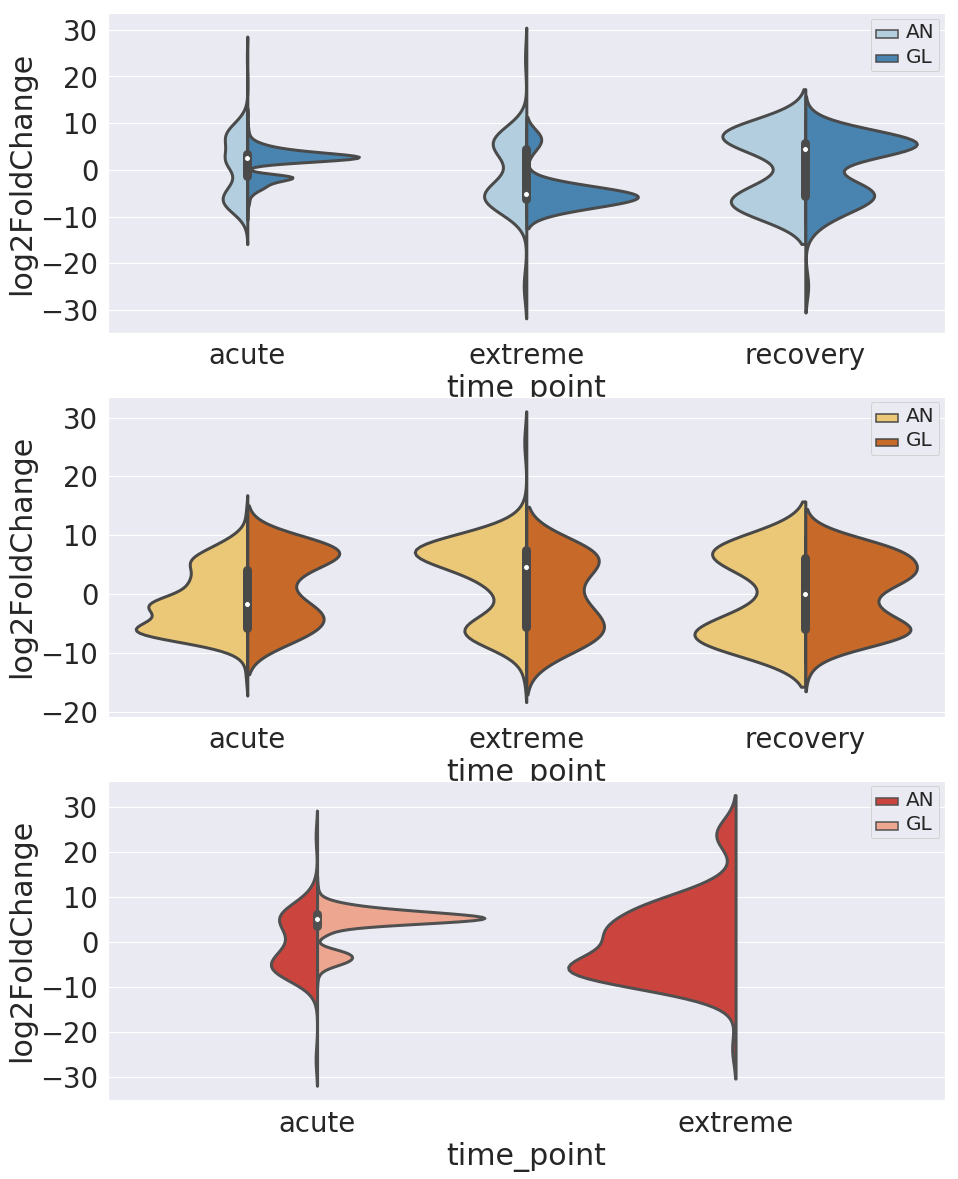

In [41]:
# (time point only)
f, axes = plt.subplots(3, 1)
sns.set(rc = {'figure.figsize':(15,20)})
ax = sns.violinplot(data=celeste, y= "log2FoldChange", x= 'time_point', hue = "tissue", palette = "Blues", ax =axes[0], split = True, linewidth = 3)
l = ax.legend()
l.set_title('') #remove legend title
plt.setp(ax.get_legend().get_texts(), fontsize='20') # resize legend text

ax = sns.violinplot(data=magna, y= "log2FoldChange", x= 'time_point', hue = "tissue", palette = "YlOrBr", ax =axes[1], split = True, linewidth = 3)
l = ax.legend()
l.set_title('') #remove legend title
plt.setp(ax.get_legend().get_texts(), fontsize='20') # resize legend text

ax = sns.violinplot(data=natalis, y= "log2FoldChange", x= 'time_point',  hue = "tissue", palette = "Reds_r", ax =axes[2], split = True, linewidth = 3)
l = ax.legend()
l.set_title('') #remove legend title
plt.setp(ax.get_legend().get_texts(), fontsize='20') # resize legend text
plt.show()
#may need to run this cell twice so images show up full sized in jupyter

In [67]:
celeste_GL.head(5)

,baseMean,celeste_pep,gene_type,lfcSE,log2FoldChange,magna_pep,natalis_pep,orthogroup,padj,pvalue,species,stat,time_point,tissue,transcript,|lfc|,expression_type
282,3.472460,NaN,unassigned,1.149702,4.595275,NaN,NaN,NaN,0.001338,0.000064,celeste,3.996926,acute,GL,TRINITY_DN100108_c0_g1_i1,4.595275,DEG
283,235.954584,NaN,unassigned,0.784454,3.172838,NaN,NaN,NaN,0.001150,0.000052,celeste,4.044644,acute,GL,TRINITY_DN100161_c0_g1_i1,3.172838,DEG
284,21.070622,NaN,unassigned,0.906360,3.247902,NaN,NaN,NaN,0.004598,0.000339,celeste,3.583456,acute,GL,TRINITY_DN100188_c0_g1_i1,3.247902,DEG
285,8.257199,NaN,unassigned,0.607269,2.798426,NaN,NaN,NaN,0.000178,0.000004,celeste,4.608211,acute,GL,TRINITY_DN100397_c0_g1_i1,2.798426,DEG
286,105.202593,NaN,unassigned,0.370870,-1.071027,NaN,NaN,NaN,0.025463,0.003878,celeste,-2.887879,acute,GL,TRINITY_DN10045_c0_g1_i1,1.071027,DEG


In [72]:
#Kruskal-Wallis analyses
# run analysis on all time points x tissues
#group by timepoint
groups = [group['log2FoldChange'].values for name, group in celeste_GL.groupby("time_point")]

#perform KW analysis
statistic, p_value = stats.kruskal(*groups)

#determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null. Significant differences exist")
else:
    print("Null cannot be rejected")

print(statistic)
print(p_value)

#if KW is significant, do Dunn's posthoc test to determine which comparisons are significantly different
if p_value < alpha:
    posthoc = sp.posthoc_dunn(celeste_GL, val_col = "log2FoldChange", group_col = "time_point", p_adjust = "bonferroni")
    print("Dunn's post-hoc test results:")
    print(posthoc)

Reject null. Significant differences exist
71.8663059649
2.47987586741e-16
Dunn's post-hoc test results:
                 acute       extreme      recovery
acute     1.000000e+00  1.878517e-16  6.124681e-01
extreme   1.878517e-16  1.000000e+00  2.210455e-13
recovery  6.124681e-01  2.210455e-13  1.000000e+00


In [73]:
#Kruskal-Wallis analyses
# run analysis on all time points x tissues
#group by timepoint
groups = [group['log2FoldChange'].values for name, group in celeste_AN.groupby("time_point")]

#perform KW analysis
statistic, p_value = stats.kruskal(*groups)

#determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null. Significant differences exist")
else:
    print("Null cannot be rejected")

print(statistic)
print(p_value)

#if KW is significant, do Dunn's posthoc test to determine which comparisons are significantly different
if p_value < alpha:
    posthoc = sp.posthoc_dunn(celeste_AN, val_col = "log2FoldChange", group_col = "time_point", p_adjust = "bonferroni")
    print("Dunn's post-hoc test results:")
    print(posthoc)

Null cannot be rejected
1.59159196345
0.451221927532


In [74]:
#Kruskal-Wallis analyses
# run analysis on all time points x tissues
#group by timepoint
groups = [group['log2FoldChange'].values for name, group in magna_GL.groupby("time_point")]

#perform KW analysis
statistic, p_value = stats.kruskal(*groups)

#determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null. Significant differences exist")
else:
    print("Null cannot be rejected")

print(statistic)
print(p_value)

#if KW is significant, do Dunn's posthoc test to determine which comparisons are significantly different
if p_value < alpha:
    posthoc = sp.posthoc_dunn(magna_GL, val_col = "log2FoldChange", group_col = "time_point", p_adjust = "bonferroni")
    print("Dunn's post-hoc test results:")
    print(posthoc)

Null cannot be rejected
2.67029077424
0.263119918428


In [75]:
#Kruskal-Wallis analyses
# run analysis on all time points x tissues
#group by timepoint
groups = [group['log2FoldChange'].values for name, group in magna_AN.groupby("time_point")]

#perform KW analysis
statistic, p_value = stats.kruskal(*groups)

#determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null. Significant differences exist")
else:
    print("Null cannot be rejected")

print(statistic)
print(p_value)

#if KW is significant, do Dunn's posthoc test to determine which comparisons are significantly different
if p_value < alpha:
    posthoc = sp.posthoc_dunn(magna_AN, val_col = "log2FoldChange", group_col = "time_point", p_adjust = "bonferroni")
    print("Dunn's post-hoc test results:")
    print(posthoc)

Reject null. Significant differences exist
26.8732242652
1.4606746607e-06
Dunn's post-hoc test results:
             acute   extreme  recovery
acute     1.000000  0.000001  1.000000
extreme   0.000001  1.000000  0.003933
recovery  1.000000  0.003933  1.000000


In [78]:
natalis_GL.tail(5)

,baseMean,celeste_pep,gene_type,lfcSE,log2FoldChange,magna_pep,natalis_pep,orthogroup,padj,pvalue,species,stat,time_point,tissue,transcript,|lfc|,expression_type
6397,9.179639,NaN,unassigned,1.929707,6.263812,NaN,NaN,NaN,0.012468,0.001170,natalis,3.245992,acute,GL,TRINITY_DN9096_c0_g1_i1,6.263812,DEG
6398,2.830383,NaN,unassigned,1.771157,4.715031,NaN,NaN,NaN,0.038897,0.007765,natalis,2.662119,acute,GL,TRINITY_DN9110_c0_g1_i1,4.715031,DEG
6399,7.561381,NaN,unassigned,1.418153,5.630848,NaN,NaN,NaN,0.001892,0.000072,natalis,3.970552,acute,GL,TRINITY_DN9183_c0_g1_i1,5.630848,DEG
6400,8.832236,NaN,unassigned,0.737457,2.563439,NaN,NaN,NaN,0.007542,0.000509,natalis,3.476050,acute,GL,TRINITY_DN9675_c0_g1_i2,2.563439,DEG
6401,3.395684,NaN,unassigned,1.047411,-2.782461,NaN,NaN,NaN,0.039445,0.007895,natalis,-2.656515,acute,GL,TRINITY_DN9775_c0_g1_i1,2.782461,DEG


In [79]:
#Kruskal-Wallis analyses
# run analysis on all time points x tissues
#group by timepoint
groups = [group['log2FoldChange'].values for name, group in natalis_AN.groupby("time_point")]

#perform KW analysis
statistic, p_value = stats.kruskal(*groups)

#determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null. Significant differences exist")
else:
    print("Null cannot be rejected")

print(statistic)
print(p_value)

#if KW is significant, do Dunn's posthoc test to determine which comparisons are significantly different
if p_value < alpha:
    posthoc = sp.posthoc_dunn(natalis_AN, val_col = "log2FoldChange", group_col = "time_point", p_adjust = "bonferroni")
    print("Dunn's post-hoc test results:")
    print(posthoc)

Null cannot be rejected
0.16343537415
0.686013145814


# celeste

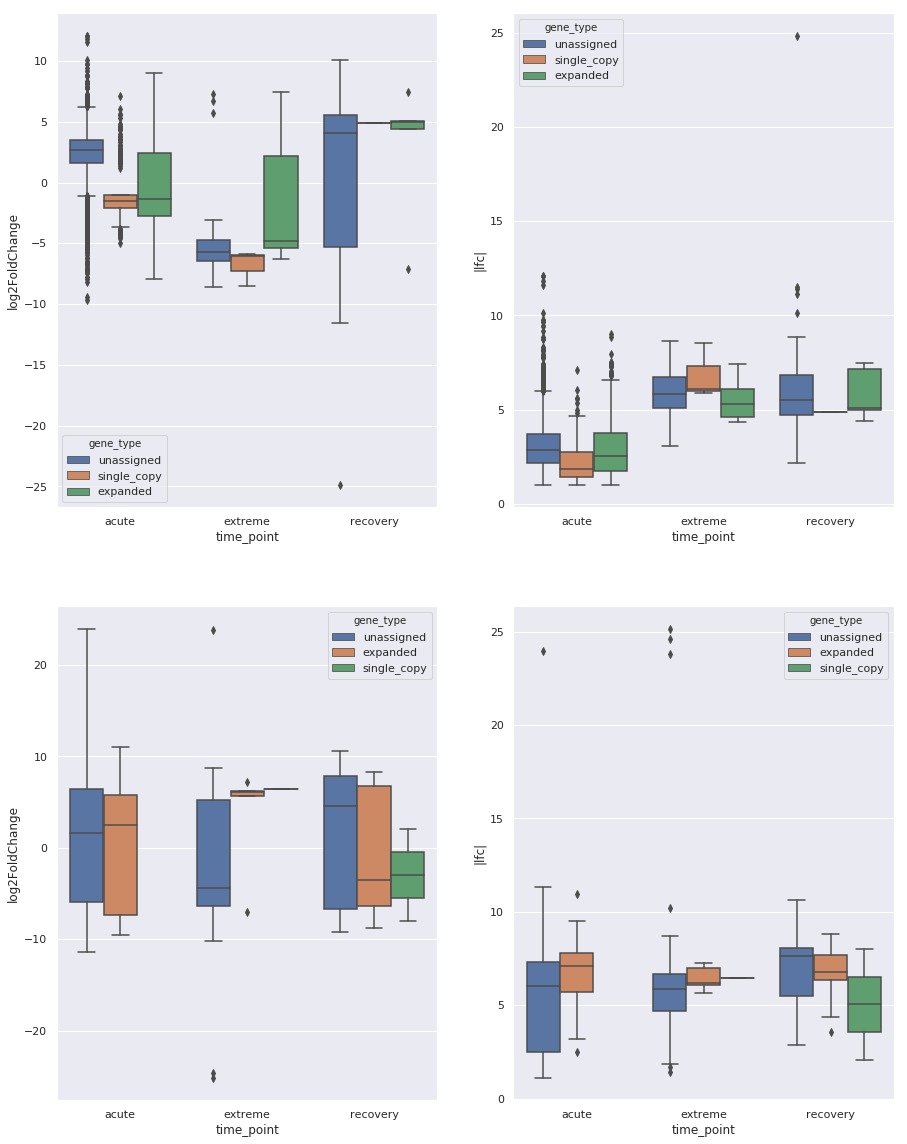

In [21]:
#celeste
f, axes = plt.subplots(2, 2)
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(data=celeste_GL, y= "log2FoldChange", x= 'time_point', hue="gene_type", ax=axes[0,0])
sns.boxplot(data=celeste_GL, y= "|lfc|", x= 'time_point', hue="gene_type", ax=axes[0,1])


sns.boxplot(data=celeste_AN, y= "log2FoldChange", x= 'time_point', hue="gene_type", ax=axes[1,0])
sns.boxplot(data=celeste_AN, y= "|lfc|", x= 'time_point', hue="gene_type", ax=axes[1,1])

[None, None, None, None, None, None]

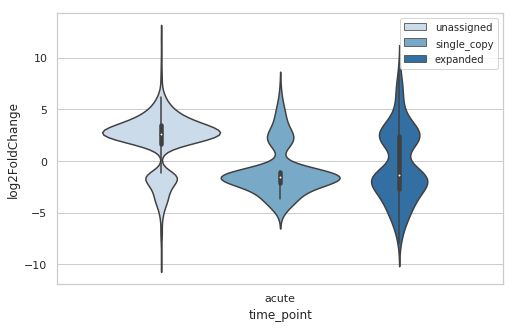

In [26]:
#Solo plot for DCGL-Acute

#sns.boxplot(data=celeste_GL, y= "log2FoldChange", x= 'time_point', hue="gene_type")
#plt.show()

sns.set(rc = {'figure.figsize':(8,5)})
sns.set_style("whitegrid")
ax = sns.violinplot(data=celeste_GL[celeste_GL['time_point'] == "acute"], y= "log2FoldChange", x= 'time_point', hue="gene_type", palette = "Blues")
l = ax.legend()
l.set_title('') #remove legend title
plt.setp(ax.get_legend().get_texts(), fontsize='10') # resize legend text


[None, None, None, None, None, None]

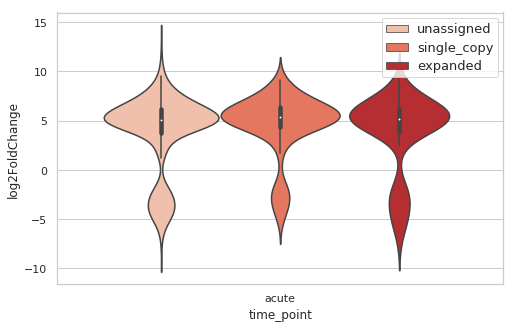

In [23]:
#Solo plot for GNGL-Acute

sns.set(rc = {'figure.figsize':(8,5)})
sns.set_style("whitegrid")
ax = sns.violinplot(data=natalis_GL[natalis_GL['time_point'] == "acute"], y= "log2FoldChange", x= 'time_point', hue="gene_type", palette = "Reds")
l = ax.legend()
l.set_title('') #remove legend title
plt.setp(ax.get_legend().get_texts(), fontsize='13') # resize legend text

In [8]:
#subset species x tissue DFs by time point to prep for ANOVAs
dcgl_A = celeste_GL[celeste_GL['time_point'] == 'acute']
dcgl_E = celeste_GL[celeste_GL['time_point'] == 'extreme']
dcgl_R = celeste_GL[celeste_GL['time_point'] == 'recovery']
dcan_A = celeste_AN[celeste_AN['time_point'] == 'acute']
dcan_E = celeste_AN[celeste_AN['time_point'] == 'extreme']
dcan_R = celeste_AN[celeste_AN['time_point'] == 'recovery']

In [9]:
dcgl_A.groupby("gene_type").describe()

baseMean                                                          \
               count        mean          std       min       25%        50%   
gene_type                                                                      
expanded       291.0  366.768067  4955.241304  1.142401  5.255630  10.604694   
single_copy    235.0   52.773947   251.421974  1.591390  6.402024  18.142035   
unassigned    2936.0  362.951386  5227.704550  1.308169  4.573635   9.071381   

                                      celeste_pep                           \
                   75%            max       count      mean       std  min   
gene_type                                                                    
expanded     27.445795   84225.334324       291.0  3.824742  3.127223  2.0   
single_copy  36.072447    3758.652346       235.0  1.000000  0.000000  1.0   
unassigned   21.911433  186238.060581         0.0       NaN       NaN  NaN   

                                   lfcSE                                \
             25%  50%  75%   max   count      mean       std       min   
gene_type                                                                
expanded     2.0  3.0  4.0  27.0   291.0  0.897246  0.489375  0.230553   
single_copy  1.0  1.0  1.0   1.0   235.0  0.668626  0.325559  0.242589   
unassigned   NaN  NaN  NaN   NaN  2936.0  0.867167  0.350349  0.215326   

                                                    log2FoldChange            \
                  25%       50%       75%       max          count      mean   
gene_type                                                                      
expanded     0.532031  0.797397  1.196223  3.385309          291.0 -0.460897   
single_copy  0.433826  0.543330  0.867120  1.499938          235.0 -0.964335   
unassigned   0.606861  0.814645  1.087500  3.386117         2936.0  1.954273   

                                                                          \
                  std       min       25%       50%       75%        max   
gene_type                                                                  
expanded     3.441158 -7.972466 -2.732037 -1.336866  2.399568   9.006997   
single_copy  2.330445 -4.971713 -2.116017 -1.502017 -1.058744   7.079549   
unassigned   2.694669 -9.651354  1.629689  2.648013  3.471686  12.089287   

            magna_pep                                                \
                count      mean       std  min  25%  50%  75%   max   
gene_type                                                             
expanded        291.0  2.415808  2.491840  0.0  1.0  2.0  3.0  22.0   
single_copy     235.0  1.548936  1.496702  0.0  1.0  1.0  2.0  12.0   
unassigned        0.0       NaN       NaN  NaN  NaN  NaN  NaN   NaN   

            natalis_pep                                                  padj  \
                  count      mean       std  min  25%  50%  75%   max   count   
gene_type                                                                       
expanded          291.0  1.797251  1.743004  0.0  1.0  1.0  2.0  11.0   291.0   
single_copy       235.0  1.361702  1.513833  0.0  1.0  1.0  1.0  14.0   235.0   
unassigned          0.0       NaN       NaN  NaN  NaN  NaN  NaN   NaN  2936.0   

                                                                             \
                 mean       std           min       25%       50%       75%   
gene_type                                                                     
expanded     0.016578  0.014880  2.915673e-10  0.002684  0.013821  0.028742   
single_copy  0.014480  0.014172  1.111048e-10  0.002735  0.008515  0.025109   
unassigned   0.013574  0.014207  6.134297e-23  0.001212  0.008063  0.022208   

                       pvalue                                              \
                  max   count      mean       std           min       25%   
gene_type                                                                   
expanded     0.049828   291.0  0.002586  0.002810  3.982320

In [10]:
#Kruskal-Wallis analyses
# run analysis on all time points x tissues
#group by timepoint
groups = [group['log2FoldChange'].values for name, group in dcgl_A.groupby("gene_type")]

#perform KW analysis
statistic, p_value = stats.kruskal(*groups)

#determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null. Significant differences exist")
else:
    print("Null cannot be rejected")

print(statistic)
print(p_value)

#if KW is significant, do Dunn's posthoc test to determine which comparisons are significantly different
if p_value < alpha:
    posthoc = sp.posthoc_dunn(dcgl_A, val_col = "log2FoldChange", group_col = "gene_type", p_adjust = "bonferroni")
    print("Dunn's post-hoc test results:")
    print(posthoc)

Reject null. Significant differences exist
321.545813157
1.50388225008e-70
Dunn's post-hoc test results:
                 expanded   single_copy    unassigned
expanded     1.000000e+00  8.020508e-02  2.842171e-34
single_copy  8.020508e-02  1.000000e+00  3.885025e-44
unassigned   2.842171e-34  3.885025e-44  1.000000e+00


In [11]:
#Kruskal-Wallis analyses
# run analysis on all time points x tissues
#group by timepoint
groups = [group['log2FoldChange'].values for name, group in dcgl_E.groupby("gene_type")]

#perform KW analysis
statistic, p_value = stats.kruskal(*groups)

#determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null. Significant differences exist")
else:
    print("Null cannot be rejected")

print(statistic)
print(p_value)

#if KW is significant, do Dunn's posthoc test to determine which comparisons are significantly different
if p_value < alpha:
    posthoc = sp.posthoc_dunn(dcgl_E, val_col = "log2FoldChange", group_col = "gene_type", p_adjust = "bonferroni")
    print("Dunn's post-hoc test results:")
    print(posthoc)

Null cannot be rejected
4.888135804
0.0868070098443


In [12]:
#Kruskal-Wallis analyses
# run analysis on all time points x tissues
#group by timepoint
groups = [group['log2FoldChange'].values for name, group in dcgl_R.groupby("gene_type")]

#perform KW analysis
statistic, p_value = stats.kruskal(*groups)

#determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null. Significant differences exist")
else:
    print("Null cannot be rejected")

print(statistic)
print(p_value)

#if KW is significant, do Dunn's posthoc test to determine which comparisons are significantly different
if p_value < alpha:
    posthoc = sp.posthoc_dunn(dcgl_R, val_col = "log2FoldChange", group_col = "gene_type", p_adjust = "bonferroni")
    print("Dunn's post-hoc test results:")
    print(posthoc)

Null cannot be rejected
0.222205949657
0.89484659751


In [13]:
#Kruskal-Wallis analyses
# run analysis on all time points x tissues
#group by timepoint
groups = [group['log2FoldChange'].values for name, group in dcan_A.groupby("gene_type")]

#perform KW analysis
statistic, p_value = stats.kruskal(*groups)

#determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null. Significant differences exist")
else:
    print("Null cannot be rejected")

print(statistic)
print(p_value)

#if KW is significant, do Dunn's posthoc test to determine which comparisons are significantly different
if p_value < alpha:
    posthoc = sp.posthoc_dunn(dcan_A, val_col = "log2FoldChange", group_col = "gene_type", p_adjust = "bonferroni")
    print("Dunn's post-hoc test results:")
    print(posthoc)

Null cannot be rejected
0.538306868796
0.463135263133


In [14]:
#Kruskal-Wallis analyses
# run analysis on all time points x tissues
#group by timepoint
groups = [group['log2FoldChange'].values for name, group in dcan_E.groupby("gene_type")]

#perform KW analysis
statistic, p_value = stats.kruskal(*groups)

#determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null. Significant differences exist")
else:
    print("Null cannot be rejected")

print(statistic)
print(p_value)

#if KW is significant, do Dunn's posthoc test to determine which comparisons are significantly different
if p_value < alpha:
    posthoc = sp.posthoc_dunn(dcan_E, val_col = "log2FoldChange", group_col = "gene_type", p_adjust = "bonferroni")
    print("Dunn's post-hoc test results:")
    print(posthoc)

Null cannot be rejected
4.12517944064
0.127124326785


In [15]:
#Kruskal-Wallis analyses
# run analysis on all time points x tissues
#group by timepoint
groups = [group['log2FoldChange'].values for name, group in dcan_R.groupby("gene_type")]

#perform KW analysis
statistic, p_value = stats.kruskal(*groups)

#determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null. Significant differences exist")
else:
    print("Null cannot be rejected")

print(statistic)
print(p_value)

#if KW is significant, do Dunn's posthoc test to determine which comparisons are significantly different
if p_value < alpha:
    posthoc = sp.posthoc_dunn(dcan_R, val_col = "log2FoldChange", group_col = "gene_type", p_adjust = "bonferroni")
    print("Dunn's post-hoc test results:")
    print(posthoc)

Null cannot be rejected
0.850755473327
0.653522878948


In [16]:
len(dcgl_A[dcgl_A['gene_type'] == 'unassigned'])

2936

# magna

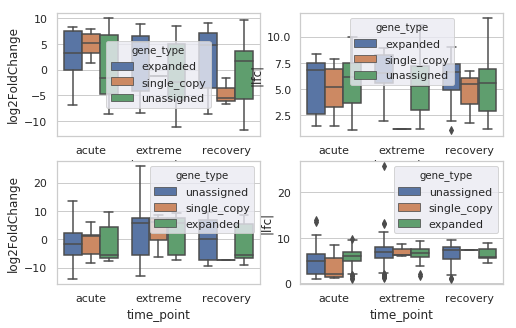

In [40]:
#magna
f, axes = plt.subplots(2, 2)
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(data=magna_GL, y= "log2FoldChange", x= 'time_point', hue="gene_type", ax=axes[0,0])
sns.boxplot(data=magna_GL, y= "|lfc|", x= 'time_point', hue="gene_type", ax=axes[0,1])

sns.boxplot(data=magna_AN, y= "log2FoldChange", x= 'time_point', hue="gene_type", ax=axes[1,0])
sns.boxplot(data=magna_AN, y= "|lfc|", x= 'time_point', hue="gene_type", ax=axes[1,1])

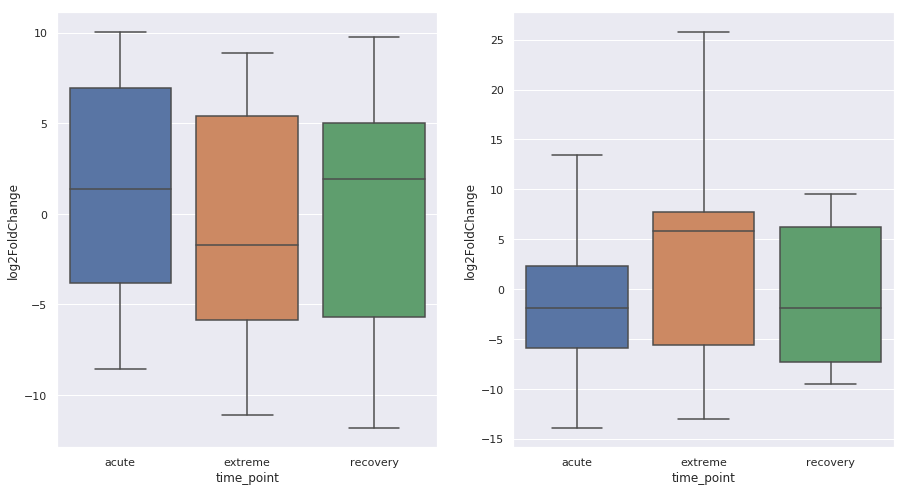

In [41]:
#celeste (time point only)
f, axes = plt.subplots(1, 2)
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(data=magna_GL, y= "log2FoldChange", x= 'time_point', ax=axes[0])
sns.boxplot(data=magna_AN, y= "log2FoldChange", x= 'time_point')

In [17]:
#subset species x tissue DFs by time point to prep for ANOVAs
dmgl_A = magna_GL[magna_GL['time_point'] == 'acute']
dmgl_E = magna_GL[magna_GL['time_point'] == 'extreme']
dmgl_R = magna_GL[magna_GL['time_point'] == 'recovery']
dman_A = magna_AN[magna_AN['time_point'] == 'acute']
dman_E = magna_AN[magna_AN['time_point'] == 'extreme']
dman_R = magna_AN[magna_AN['time_point'] == 'recovery']

In [18]:
#Kruskal-Wallis analyses
# run analysis on all time points x tissues
#group by timepoint
groups = [group['log2FoldChange'].values for name, group in dmgl_A.groupby("gene_type")]

#perform KW analysis
statistic, p_value = stats.kruskal(*groups)

#determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null. Significant differences exist")
else:
    print("Null cannot be rejected")

print(statistic)
print(p_value)

#if KW is significant, do Dunn's posthoc test to determine which comparisons are significantly different
if p_value < alpha:
    posthoc = sp.posthoc_dunn(dmgl_A, val_col = "log2FoldChange", group_col = "gene_type", p_adjust = "bonferroni")
    print("Dunn's post-hoc test results:")
    print(posthoc)

Null cannot be rejected
3.50899088847
0.17299450565


In [19]:
#Kruskal-Wallis analyses
# run analysis on all time points x tissues
#group by timepoint
groups = [group['log2FoldChange'].values for name, group in dmgl_E.groupby("gene_type")]

#perform KW analysis
statistic, p_value = stats.kruskal(*groups)

#determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null. Significant differences exist")
else:
    print("Null cannot be rejected")

print(statistic)
print(p_value)

#if KW is significant, do Dunn's posthoc test to determine which comparisons are significantly different
if p_value < alpha:
    posthoc = sp.posthoc_dunn(dmgl_E, val_col = "log2FoldChange", group_col = "gene_type", p_adjust = "bonferroni")
    print("Dunn's post-hoc test results:")
    print(posthoc)

Null cannot be rejected
2.24225274725
0.325912488568


In [20]:
#Kruskal-Wallis analyses
# run analysis on all time points x tissues
#group by timepoint
groups = [group['log2FoldChange'].values for name, group in dmgl_R.groupby("gene_type")]

#perform KW analysis
statistic, p_value = stats.kruskal(*groups)

#determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null. Significant differences exist")
else:
    print("Null cannot be rejected")

print(statistic)
print(p_value)

#if KW is significant, do Dunn's posthoc test to determine which comparisons are significantly different
if p_value < alpha:
    posthoc = sp.posthoc_dunn(dmgl_R, val_col = "log2FoldChange", group_col = "gene_type", p_adjust = "bonferroni")
    print("Dunn's post-hoc test results:")
    print(posthoc)

Null cannot be rejected
4.97728977494
0.083022395069


In [21]:
#Kruskal-Wallis analyses
# run analysis on all time points x tissues
#group by timepoint
groups = [group['log2FoldChange'].values for name, group in dman_A.groupby("gene_type")]

#perform KW analysis
statistic, p_value = stats.kruskal(*groups)

#determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null. Significant differences exist")
else:
    print("Null cannot be rejected")

print(statistic)
print(p_value)

#if KW is significant, do Dunn's posthoc test to determine which comparisons are significantly different
if p_value < alpha:
    posthoc = sp.posthoc_dunn(dman_A, val_col = "log2FoldChange", group_col = "gene_type", p_adjust = "bonferroni")
    print("Dunn's post-hoc test results:")
    print(posthoc)

Null cannot be rejected
1.48637850085
0.475594703625


In [22]:
#Kruskal-Wallis analyses
# run analysis on all time points x tissues
#group by timepoint
groups = [group['log2FoldChange'].values for name, group in dman_E.groupby("gene_type")]

#perform KW analysis
statistic, p_value = stats.kruskal(*groups)

#determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null. Significant differences exist")
else:
    print("Null cannot be rejected")

print(statistic)
print(p_value)

#if KW is significant, do Dunn's posthoc test to determine which comparisons are significantly different
if p_value < alpha:
    posthoc = sp.posthoc_dunn(dman_E, val_col = "log2FoldChange", group_col = "gene_type", p_adjust = "bonferroni")
    print("Dunn's post-hoc test results:")
    print(posthoc)

Null cannot be rejected
0.087256652474
0.957309698257


In [23]:
#Kruskal-Wallis analyses
# run analysis on all time points x tissues
#group by timepoint
groups = [group['log2FoldChange'].values for name, group in dman_R.groupby("gene_type")]

#perform KW analysis
statistic, p_value = stats.kruskal(*groups)

#determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null. Significant differences exist")
else:
    print("Null cannot be rejected")

print(statistic)
print(p_value)

#if KW is significant, do Dunn's posthoc test to determine which comparisons are significantly different
if p_value < alpha:
    posthoc = sp.posthoc_dunn(dman_R, val_col = "log2FoldChange", group_col = "gene_type", p_adjust = "bonferroni")
    print("Dunn's post-hoc test results:")
    print(posthoc)

Null cannot be rejected
1.93978003421
0.379124733047


# natalis

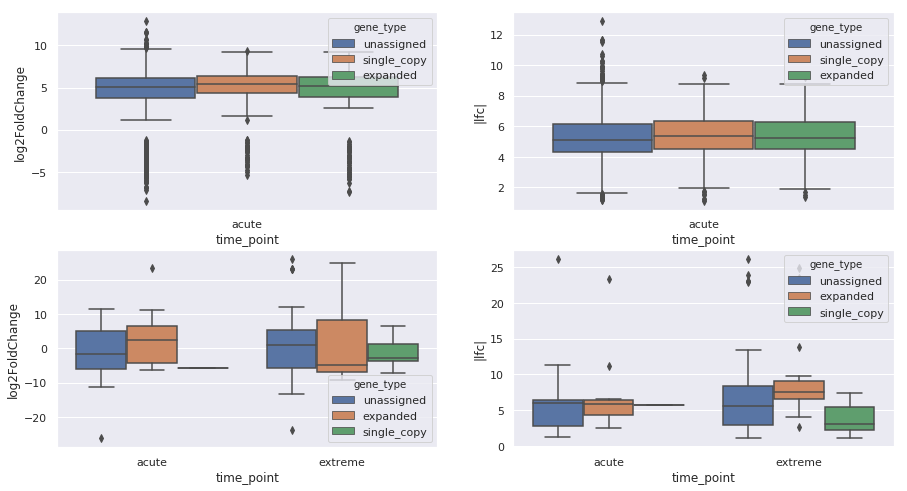

In [49]:
#natalis
f, axes = plt.subplots(2, 2)
sns.set(rc = {'figure.figsize':(15,8)})

sns.boxplot(data=natalis_GL, y= "log2FoldChange", x= 'time_point', hue="gene_type", ax=axes[0,0])
sns.boxplot(data=natalis_GL, y= "|lfc|", x= 'time_point', hue="gene_type", ax=axes[0,1])

sns.boxplot(data=natalis_AN, y= "log2FoldChange", x= 'time_point', hue="gene_type", ax=axes[1,0])
sns.boxplot(data=natalis_AN, y= "|lfc|", x= 'time_point', hue="gene_type", ax=axes[1,1])

In [24]:
#subset species x tissue DFs by time point to prep for ANOVAs
gngl_A = natalis_GL[natalis_GL['time_point'] == 'acute']
gngl_E = natalis_GL[natalis_GL['time_point'] == 'extreme']
gnan_A = natalis_AN[natalis_AN['time_point'] == 'acute']
gnan_E = natalis_AN[natalis_AN['time_point'] == 'extreme']

In [25]:
#Kruskal-Wallis analyses
# run analysis on all time points x tissues
#group by timepoint
groups = [group['log2FoldChange'].values for name, group in gngl_A.groupby("gene_type")]

#perform KW analysis
statistic, p_value = stats.kruskal(*groups)

#determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null. Significant differences exist")
else:
    print("Null cannot be rejected")

print(statistic)
print(p_value)

#if KW is significant, do Dunn's posthoc test to determine which comparisons are significantly different
if p_value < alpha:
    posthoc = sp.posthoc_dunn(gngl_A, val_col = "log2FoldChange", group_col = "gene_type", p_adjust = "bonferroni")
    print("Dunn's post-hoc test results:")
    print(posthoc)

Reject null. Significant differences exist
7.39208601457
0.024821551098
Dunn's post-hoc test results:
             expanded  single_copy  unassigned
expanded     1.000000     0.164151    1.000000
single_copy  0.164151     1.000000    0.020819
unassigned   1.000000     0.020819    1.000000


In [28]:
#Kruskal-Wallis analyses
# run analysis on all time points x tissues
#group by timepoint
groups = [group['log2FoldChange'].values for name, group in gnan_A.groupby("gene_type")]

#perform KW analysis
statistic, p_value = stats.kruskal(*groups)

#determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null. Significant differences exist")
else:
    print("Null cannot be rejected")

print(statistic)
print(p_value)

#if KW is significant, do Dunn's posthoc test to determine which comparisons are significantly different
if p_value < alpha:
    posthoc = sp.posthoc_dunn(gnan_A, val_col = "log2FoldChange", group_col = "gene_type", p_adjust = "bonferroni")
    print("Dunn's post-hoc test results:")
    print(posthoc)

Null cannot be rejected
1.91169044933
0.384487029255


In [29]:
#Kruskal-Wallis analyses
# run analysis on all time points x tissues
#group by timepoint
groups = [group['log2FoldChange'].values for name, group in gnan_E.groupby("gene_type")]

#perform KW analysis
statistic, p_value = stats.kruskal(*groups)

#determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null. Significant differences exist")
else:
    print("Null cannot be rejected")

print(statistic)
print(p_value)

#if KW is significant, do Dunn's posthoc test to determine which comparisons are significantly different
if p_value < alpha:
    posthoc = sp.posthoc_dunn(gnan_E, val_col = "log2FoldChange", group_col = "gene_type", p_adjust = "bonferroni")
    print("Dunn's post-hoc test results:")
    print(posthoc)

Null cannot be rejected
0.0944510035418
0.953872273449


# Fisher Tests: prep

In [45]:
#merge dfs from DEGs and nonDEGs to create large table of all sum stats
degs_stats = pd.read_csv("sum_stats_lfc_TXOG.csv")
nondegs_stats= pd.read_csv("sum_stats_lfc_TXOG_nonDEGs.csv")

In [46]:
all_genes_sumstats = pd.concat ([degs_stats, nondegs_stats], axis=0)
all_genes_sumstats.drop(columns = "Unnamed: 0", inplace=True)
all_genes_sumstats.to_csv("all_genes_sumstats.csv")

In [47]:
#bring in data from DEGs and nonDEGs for crosstab
degs = pd.read_csv("all_spp_t_tp_lfc_data.csv")
nondegs= pd.read_csv("all_spp_t_tp_lfc_data_nonDEGs.csv")

In [48]:
all_genes = pd.concat ([degs, nondegs], axis=0)
all_genes.drop(columns = ["Unnamed: 0", "baseMean", 'celeste_pep', 'lfcSE', 'log2FoldChange', 'magna_pep',
                          'natalis_pep', 'orthogroup', 'padj', 'pvalue','stat', '|lfc|'] ,inplace=True)
all_genes.shape

(243400, 6)

In [49]:
combo_dict = {k:v for k, v in all_genes.groupby(["species", "tissue", "time_point"])}

In [50]:
combo_dict_keys = [*combo_dict.keys()]

In [51]:
#create crosstab between expression_type and gene_type
data_list = []

for key in combo_dict_keys:
    print('=====================================================')
    print('key', key, '\ncrosstab:\n', pd.crosstab(index=combo_dict[key]['expression_type'], columns = combo_dict[key]["gene_type"]))
    data = pd.crosstab(index=combo_dict[key]['expression_type'], columns = combo_dict[key]["gene_type"])
    data = pd.DataFrame(data)
    data_list.append([key, data])
    
data_list

key ('celeste', 'AN', 'acute') 
crosstab:
 gene_type        expanded  single_copy  unassigned
expression_type                                   
DEG                    19            0         149
nonDEG                112            3       17509
key ('celeste', 'AN', 'extreme') 
crosstab:
 gene_type        expanded  single_copy  unassigned
expression_type                                   
DEG                     5            1          62
nonDEG                122            5       24604
key ('celeste', 'AN', 'recovery') 
crosstab:
 gene_type        expanded  single_copy  unassigned
expression_type                                   
DEG                     9            2          35
nonDEG                185           45       25751
key ('celeste', 'GL', 'acute') 
crosstab:
 gene_type        expanded  single_copy  unassigned
expression_type                                   
DEG                   291          235        2936
nonDEG                158           65       11280
key ('c

[[('celeste', 'AN', 'acute'),
  gene_type        expanded  single_copy  unassigned
  expression_type                                   
  DEG                    19            0         149
  nonDEG                112            3       17509],
 [('celeste', 'AN', 'extreme'),
  gene_type        expanded  single_copy  unassigned
  expression_type                                   
  DEG                     5            1          62
  nonDEG                122            5       24604],
 [('celeste', 'AN', 'recovery'),
  gene_type        expanded  single_copy  unassigned
  expression_type                                   
  DEG                     9            2          35
  nonDEG                185           45       25751],
 [('celeste', 'GL', 'acute'),
  gene_type        expanded  single_copy  unassigned
  expression_type                                   
  DEG                   291          235        2936
  nonDEG                158           65       11280],
 [('celeste', 'GL',

# Fisher Tests
1. orthogroup assignment status x significantly differentially expressed status

and of assigned genes:

2. gene copy amount x significantly differentially expressed status

### celeste: AN acute

In [2]:
p_info = []

In [5]:
#assigned vs unassigned
data = [[119, 13],
       [15639, 189]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.110625802358


In [7]:
#single vs expanded
data = [[13, 0],
       [166, 23]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

inf


### celeste: AN extreme

In [9]:
#assigned vs unassigned
data = [[49, 12],
       [20841, 256]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.0501575420245


In [8]:
#single vs expanded
data = [[10, 2],
       [217, 39]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.898617511521


### celeste: AN recovery

In [10]:
#assigned vs unassigned
data = [[24, 7],
       [22790, 505]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.0759731711904


In [11]:
#single vs expanded
data = [[7, 0],
       [368, 137]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

inf


### celeste: GL acute

In [12]:
#assigned vs unassigned
data = [[1720, 292],
       [15443, 395]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.15066452948


In [13]:
#single vs expanded
data = [[155, 137],
       [281, 114]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.458996804946


### celeste: GL extreme

In [14]:
#assigned vs unassigned
data = [[27, 8],
       [9352, 66]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.0238184345595


In [15]:
#single vs expanded
data = [[4, 4],
       [61, 5]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.0819672131148


### celeste: GL recovery

In [16]:
#assigned vs unassigned
data = [[61, 2],
       [10388, 85]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.249566807855


In [17]:
#single vs expanded
data = [[2, 0],
       [79, 6]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

inf


### magna: AN acute

In [18]:
#assigned vs unassigned
data = [[96, 30],
       [21289, 619]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.0930433557236


In [19]:
#single vs expanded
data = [[23, 7],
       [469, 150]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

1.05086810844


### magna: AN extreme

In [20]:
#assigned vs unassigned
data = [[64, 18],
       [19539, 292]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.0531358934553


In [21]:
#single vs expanded
data = [[16, 2],
       [271, 21]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.619926199262


### magna: AN recovery

In [22]:
#assigned vs unassigned
data = [[28, 9],
       [19676, 371]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.0586614262158


In [23]:
#single vs expanded
data = [[9, 0],
       [308, 63]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

inf


### magna: GL acute

In [24]:
#assigned vs unassigned
data = [[45, 13],
       [10026, 132]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.0455738157713


In [25]:
#single vs expanded
data = [[10, 3],
       [125, 7]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.186666666667


### magna: GL extreme

In [26]:
#assigned vs unassigned
data = [[26, 11],
       [12112, 194]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.0378587726672


In [27]:
#single vs expanded
data = [[10, 1],
       [181, 13]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.718232044199


### magna: GL recovery 

In [28]:
#assigned vs unassigned
data = [[57, 22],
       [9036, 98]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.0280997223228


In [29]:
#single vs expanded
data = [[19, 3],
       [95, 3]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.2


### natalis AN acute

In [30]:
#assigned vs unassigned
data = [[33, 8],
       [17364, 457]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.108565134762


In [31]:
#single vs expanded
data = [[6, 2],
       [354, 103]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.872881355932


### natalis AN extreme

In [32]:
#assigned vs unassigned
data = [[95, 27],
       [18566, 549]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.10404323315


In [33]:
#single vs expanded
data = [[19, 8],
       [419, 130]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.736873508353


### natalis GL acute

In [34]:
#assigned vs unassigned
data = [[833, 303],
       [5503, 107]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.053454791236


In [35]:
#single vs expanded
data = [[130, 173],
       [100, 7]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.0526011560694


### natalis GL extreme

In [36]:
#assigned vs unassigned
data = [[0, 1],
       [10475, 320]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

0.0


In [37]:
#single vs expanded
data = [[1, 0],
       [262, 58]]

p_info.append(stats.fisher_exact(data)[1])
print(stats.fisher_exact(data)[0])

inf


In [86]:
p_info

[1.2508325065236917e-08,
 0.36941278690887991,
 1.3391202238854337e-11,
 1.0,
 3.9231289518365402e-06,
 0.19784899738175188,
 4.7169525046006265e-102,
 1.4336743439366788e-06,
 1.9013316555519531e-10,
 0.0060370860215454968,
 0.095321971294433899,
 1.0,
 3.9007200159134121e-19,
 1.0,
 4.1964451953930116e-16,
 0.63261679455776731,
 2.202726959293502e-08,
 0.36603587589202635,
 1.0058813631789022e-12,
 0.047076826423705684,
 1.1886299995206527e-11,
 0.54999316320178526,
 4.828942557881387e-24,
 0.074369096608226118,
 8.9185875704850272e-06,
 1.0,
 2.4472864790201977e-16,
 0.49057929798322569,
 4.8166644670711229e-157,
 2.2522858092456969e-22,
 0.029733234531731947,
 1.0]

In [87]:
import statsmodels

In [88]:
numpy_data = statsmodels.stats.multitest.fdrcorrection(p_info, alpha=0.05)
numpy_p_value = np.array(numpy_data[1])
numpy_status = np.array(numpy_data[0])
numpy_p_value

array([  3.33555335e-008,   4.92550383e-001,   4.28518472e-011,
         1.00000000e+000,   8.36934176e-006,   2.87780360e-001,
         7.54712401e-101,   3.27696993e-006,   5.53114663e-010,
         1.13639266e-002,   1.45252528e-001,   1.00000000e+000,
         2.49646081e-018,   1.00000000e+000,   1.91837495e-015,
         7.49768053e-001,   5.42209713e-008,   4.92550383e-001,
         4.02352545e-012,   7.92872866e-002,   4.22624000e-011,
         6.76914662e-001,   5.15087206e-023,   1.18990555e-001,
         1.78371751e-005,   1.00000000e+000,   1.30521946e-015,
         6.27941501e-001,   1.54133263e-155,   1.80182865e-021,
         5.28590836e-002,   1.00000000e+000])

In [89]:
df = pd.DataFrame(data=numpy_p_value, index=['celeste_AN_acute_asgn', 'celeste_AN_acute_cpy',
                                          'celeste_AN_extreme_asgn', 'celeste_AN_extreme_cpy',
                                         'celeste_AN_recovery_asgn', 'celeste_AN_recovery_cpy',
                                         'celeste_GL_acute_asgn', 'celeste_GL_acute_cpy',
                                          'celeste_GL_extreme_asgn', 'celeste_GL_extreme_cpy',
                                         'celeste_GL_recovery_asgn', 'celeste_GL_recovery_cpy',
                                         'magna_AN_acute_asgn', 'magna_AN_acute_cpy',
                                          'magna_AN_extreme_asgn', 'magna_AN_extreme_cpy',
                                         'magna_AN_recovery_asgn', 'magna_AN_recovery_cpy',
                                         'magna_GL_acute_asgn', 'magna_GL_acute_cpy',
                                          'magna_GL_extreme_asgn', 'magna_GL_extreme_cpy',
                                         'magna_GL_recovery_asgn', 'magna_GL_recovery_cpy',
                                         'natalis_AN_acute_asgn', 'natalis_AN_acute_cpy',
                                          'natalis_AN_extreme_asgn', 'natalis_AN_extreme_cpy',
                                         'natalis_GL_acute_asgn', 'natalis_GL_acute_cpy',
                                          'natalis_GL_extreme_asgn', 'natalis_GL_extreme_cpy'])

In [90]:
df.reset_index(inplace=True)

In [91]:
df["p-value"] = p_info
df['Reject null?'] = numpy_status
df = df.rename(columns = {"index": "Test", 0:"p-adj"})
df

,Test,p-adj,p-value,Reject null?
0,celeste_AN_acute_asgn,3.335553e-08,1.250833e-08,True
1,celeste_AN_acute_cpy,4.925504e-01,3.694128e-01,False
2,celeste_AN_extreme_asgn,4.285185e-11,1.339120e-11,True
3,celeste_AN_extreme_cpy,1.000000e+00,1.000000e+00,False
4,celeste_AN_recovery_asgn,8.369342e-06,3.923129e-06,True
5,celeste_AN_recovery_cpy,2.877804e-01,1.978490e-01,False
6,celeste_GL_acute_asgn,7.547124e-101,4.716953e-102,True
7,celeste_GL_acute_cpy,3.276970e-06,1.433674e-06,True
8,celeste_GL_extreme_asgn,5.531147e-10,1.901332e-10,True
9,celeste_GL_extreme_cpy,1.136393e-02,6.037086e-03,True


In [93]:
#Significant test subset
sig_fisher_tests = df[df['Reject null?'] == True]
sig_fisher_tests

,Test,p-adj,p-value,Reject null?
0,celeste_AN_acute_asgn,3.335553e-08,1.250833e-08,True
2,celeste_AN_extreme_asgn,4.285185e-11,1.339120e-11,True
4,celeste_AN_recovery_asgn,8.369342e-06,3.923129e-06,True
6,celeste_GL_acute_asgn,7.547124e-101,4.716953e-102,True
7,celeste_GL_acute_cpy,3.276970e-06,1.433674e-06,True
8,celeste_GL_extreme_asgn,5.531147e-10,1.901332e-10,True
9,celeste_GL_extreme_cpy,1.136393e-02,6.037086e-03,True
12,magna_AN_acute_asgn,2.496461e-18,3.900720e-19,True
14,magna_AN_extreme_asgn,1.918375e-15,4.196445e-16,True
16,magna_AN_recovery_asgn,5.422097e-08,2.202727e-08,True


In [94]:
sig_fisher_tests['summary'] = ['More DEGs assigned than expected',
                              'More DEGs assigned than expected',
                              'More DEGs assigned than expected',
                              'More DEGs assigned than expected', 
                               'More DEGs single copy than expected',
                              'More DEGs assigned than expected',
                               'More DEGs single copy than expected',
                               'More DEGs assigned than expected',
                               'More DEGs assigned than expected',
                               'More DEGs assigned than expected',
                               'More DEGs assigned than expected',
                                'More DEGs assigned than expected',
                               'More DEGs assigned than expected',
                               'More DEGs assigned than expected',
                               'More DEGs assigned than expected',
                               'More DEGs assigned than expected', 
                               'More DEGs single copy than expected']
sig_fisher_tests = sig_fisher_tests[['Test', 'p-value', 'p-adj', 'Reject null?', 'summary']]

sig_fisher_tests

,Test,p-value,p-adj,Reject null?,summary
0,celeste_AN_acute_asgn,1.250833e-08,3.335553e-08,True,More DEGs assigned than expected
2,celeste_AN_extreme_asgn,1.339120e-11,4.285185e-11,True,More DEGs assigned than expected
4,celeste_AN_recovery_asgn,3.923129e-06,8.369342e-06,True,More DEGs assigned than expected
6,celeste_GL_acute_asgn,4.716953e-102,7.547124e-101,True,More DEGs assigned than expected
7,celeste_GL_acute_cpy,1.433674e-06,3.276970e-06,True,More DEGs single copy than expected
8,celeste_GL_extreme_asgn,1.901332e-10,5.531147e-10,True,More DEGs assigned than expected
9,celeste_GL_extreme_cpy,6.037086e-03,1.136393e-02,True,More DEGs single copy than expected
12,magna_AN_acute_asgn,3.900720e-19,2.496461e-18,True,More DEGs assigned than expected
14,magna_AN_extreme_asgn,4.196445e-16,1.918375e-15,True,More DEGs assigned than expected
16,magna_AN_recovery_asgn,2.202727e-08,5.422097e-08,True,More DEGs assigned than expected


# Annotation pipeline: WGCNA results

In [6]:
# merge orthogroups.csv with module_ogs (key: orthogroup)
celeste_orthos = pd.read_csv("celeste_ogs.csv")
celeste_orthos = pd.melt(celeste_orthos, id_vars ="orthogroup")
celeste_orthos = celeste_orthos.drop(columns="variable")
celeste_orthos = celeste_orthos.rename(columns = {"value":"dc_transcript"})

#merge with module_ogs csv to select only 1:1:1 ogs
og_modules = pd.read_csv("module_ogs_3.14.22.csv")
celeste_orthos = pd.merge(og_modules, celeste_orthos, on="orthogroup")
celeste_orthos = celeste_orthos.drop_duplicates(subset = 'orthogroup', keep='first')
celeste_orthos.head(5)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,orthogroup,module,dc_transcript
0,OG0009155,ME0,TRINITY_DN10888_c0_g1_i1
68,OG0009161,ME0,TRINITY_DN11542_c0_g1_i1
136,OG0009163,ME0,TRINITY_DN11808_c0_g1_i1
204,OG0009187,ME0,TRINITY_DN14705_c0_g2_i1
272,OG0009195,ME0,TRINITY_DN15016_c0_g2_i1


In [7]:
#magna
magna_orthos = pd.read_csv("magna_ogs.csv")
magna_orthos = pd.melt(magna_orthos, id_vars ="orthogroup")
magna_orthos = magna_orthos.drop(columns="variable")
magna_orthos = magna_orthos.rename(columns = {"value":"dm_transcript"})

#merge with module_ogs csv to select only 1:1:1 ogs
magna_orthos = pd.merge(og_modules, magna_orthos, on="orthogroup")
magna_orthos = magna_orthos.drop_duplicates(subset = 'orthogroup', keep='first')
magna_orthos.head(5)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,orthogroup,module,dm_transcript
0,OG0009155,ME0,TRINITY_DN24111_c5_g4_i1
31,OG0009161,ME0,TRINITY_DN19807_c0_g1_i1
62,OG0009163,ME0,TRINITY_DN22913_c0_g3_i2
93,OG0009187,ME0,TRINITY_DN23829_c2_g1_i1
124,OG0009195,ME0,TRINITY_DN20127_c0_g1_i1


In [8]:
#natalis
natalis_orthos = pd.read_csv("natalis_ogs.csv")
natalis_orthos = pd.melt(natalis_orthos, id_vars ="orthogroup")
natalis_orthos = natalis_orthos.drop(columns="variable")
natalis_orthos = natalis_orthos.rename(columns = {"value":"gn_transcript"})

#merge with module_ogs csv to select only 1:1:1 ogs
natalis_orthos = pd.merge(og_modules, natalis_orthos, on="orthogroup")
natalis_orthos = natalis_orthos.drop_duplicates(subset = 'orthogroup', keep='first')
natalis_orthos.head(5)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,orthogroup,module,gn_transcript
0,OG0009155,ME0,TRINITY_DN29848_c0_g1_i1
32,OG0009161,ME0,TRINITY_DN15642_c0_g1_i1
64,OG0009163,ME0,TRINITY_DN21591_c0_g2_i1
96,OG0009187,ME0,TRINITY_DN53329_c0_g1_i1
128,OG0009195,ME0,TRINITY_DN46745_c0_g1_i1


In [9]:
#merge all dfs
all_spp_TX_orthos = pd.merge(celeste_orthos, natalis_orthos[['orthogroup','gn_transcript']], on="orthogroup")
all_spp_TX_orthos = pd.merge(all_spp_TX_orthos, magna_orthos[['orthogroup','dm_transcript']], on="orthogroup")
all_spp_TX_orthos.head()

,orthogroup,module,dc_transcript,gn_transcript,dm_transcript
0,OG0009155,ME0,TRINITY_DN10888_c0_g1_i1,TRINITY_DN29848_c0_g1_i1,TRINITY_DN24111_c5_g4_i1
1,OG0009161,ME0,TRINITY_DN11542_c0_g1_i1,TRINITY_DN15642_c0_g1_i1,TRINITY_DN19807_c0_g1_i1
2,OG0009163,ME0,TRINITY_DN11808_c0_g1_i1,TRINITY_DN21591_c0_g2_i1,TRINITY_DN22913_c0_g3_i2
3,OG0009187,ME0,TRINITY_DN14705_c0_g2_i1,TRINITY_DN53329_c0_g1_i1,TRINITY_DN23829_c2_g1_i1
4,OG0009195,ME0,TRINITY_DN15016_c0_g2_i1,TRINITY_DN46745_c0_g1_i1,TRINITY_DN20127_c0_g1_i1


In [10]:
#merge with gene info df based on OG name
gene_info = pd.read_csv("geneInfo_ALL_concat.csv")
gene_info = pd.merge(all_spp_TX_orthos, gene_info, on="orthogroup")
gene_info = gene_info.drop(columns = "moduleGenes")
gene_info.head(5)

,orthogroup,module,dc_transcript,gn_transcript,dm_transcript,GS.celeste,p.GS.celeste,GS.magna,p.GS.magna,GS.natalis,...,MM.1,p.MM.1,MM.6,p.MM.6,MM.2,p.MM.2,MM.0,p.MM.0,MM.3,p.MM.3
0,OG0009155,ME0,TRINITY_DN10888_c0_g1_i1,TRINITY_DN29848_c0_g1_i1,TRINITY_DN24111_c5_g4_i1,-0.398141,1.468160e-04,0.543519,6.390000e-08,-0.155618,...,0.222337,3.963516e-02,0.564416,1.520000e-08,0.430579,3.500000e-05,0.427593,4.020000e-05,0.376073,0.000359
1,OG0009161,ME0,TRINITY_DN11542_c0_g1_i1,TRINITY_DN15642_c0_g1_i1,TRINITY_DN19807_c0_g1_i1,-0.020614,8.505696e-01,-0.227313,3.530807e-02,0.265391,...,0.589575,2.340000e-09,0.528022,1.740000e-07,0.672256,1.370000e-12,0.305330,4.254035e-03,0.298090,0.005310
2,OG0009163,ME0,TRINITY_DN11808_c0_g1_i1,TRINITY_DN21591_c0_g2_i1,TRINITY_DN22913_c0_g3_i2,0.524795,2.140000e-07,-0.246834,2.195616e-02,-0.297539,...,-0.093021,3.942879e-01,-0.210451,5.178449e-02,0.321839,2.512984e-03,0.555175,2.900000e-08,0.479792,0.000003
3,OG0009187,ME0,TRINITY_DN14705_c0_g2_i1,TRINITY_DN53329_c0_g1_i1,TRINITY_DN23829_c2_g1_i1,-0.332394,1.767145e-03,-0.311123,3.548328e-03,0.688845,...,0.447621,1.550000e-05,0.211944,5.010789e-02,0.028979,7.911145e-01,-0.469589,5.090000e-06,-0.356150,0.000764
4,OG0009195,ME0,TRINITY_DN15016_c0_g2_i1,TRINITY_DN46745_c0_g1_i1,TRINITY_DN20127_c0_g1_i1,-0.735186,7.660000e-16,0.402061,1.244180e-04,0.356590,...,0.348003,1.026042e-03,0.404280,1.131850e-04,-0.019057,8.617414e-01,-0.329927,1.920886e-03,-0.334624,0.001638


In [11]:
#merge with DIAMOND DATABASES (make sure to make new column in DIAMOND db with spp name since
#we have three diamond dbs for each spp, and it uses trinity IDs which are non-unique across spp)

dc_diamond = pd.read_csv("DC_matches.tsv", sep='\t', header= None)
dc_diamond = dc_diamond.rename(columns = {0: 'dc_transcript', 1: "target_accession",
                                         2: "sequence_identity", 3: "length",
                                         4: "mismatches", 5: "gap_openings",
                                         6: "Query_start", 7: "query_end",
                                         8: "Target_start", 9: "Target_end",
                                         10: 'e-value', 11: "bit_score"})

#select the highest hit for all transcripts by e-value; drop the rest
dc_diamond.sort_values(by='sequence_identity', ascending=False, inplace=True)
dc_diamond = dc_diamond.drop_duplicates(subset = 'dc_transcript', keep='first')


dm_diamond = pd.read_csv("DM_matches.tsv", sep='\t', header= None)
dm_diamond = dm_diamond.rename(columns = {0: 'dm_transcript', 1: "target_accession",
                                         2: "sequence_identity", 3: "length",
                                         4: "mismatches", 5: "gap_openings",
                                         6: "Query_start", 7: "query_end",
                                         8: "Target_start", 9: "Target_end",
                                         10: 'e-value', 11: "bit_score"})
dm_diamond.sort_values(by='e-value', ascending=True, inplace=True)

#select the highest hit for all transcripts by e-value; drop the rest
dm_diamond.sort_values(by='sequence_identity', ascending=False, inplace=True)
dm_diamond = dm_diamond.drop_duplicates(subset = 'dm_transcript', keep='first')


gn_diamond = pd.read_csv("GN_matches.tsv", sep='\t', header= None)
gn_diamond = gn_diamond.rename(columns = {0: 'gn_transcript', 1: "target_accession",
                                         2: "sequence_identity", 3: "length",
                                         4: "mismatches", 5: "gap_openings",
                                         6: "Query_start", 7: "query_end",
                                         8: "Target_start", 9: "Target_end",
                                         10: 'e-value', 11: "bit_score"})
gn_diamond.sort_values(by='e-value', ascending=True, inplace=True)

#select the highest hit for all transcripts by e-value; drop the rest
gn_diamond.sort_values(by='sequence_identity', ascending=False, inplace=True)
gn_diamond = gn_diamond.drop_duplicates(subset = 'gn_transcript', keep='first')

In [12]:
dc_diamond.shape #most matches found for this transcriptome

(73770, 12)

In [13]:
dm_diamond.shape

(58031, 12)

In [14]:
gn_diamond.shape

(50303, 12)

In [15]:
#merge DC diamond with gene_info df on "dc_transcript"

gene_info = pd.merge(gene_info, dc_diamond, how="left", on="dc_transcript")

In [16]:
gene_info.shape #everything has a match!!!

(743, 44)

In [17]:
#Subset by Module and sort by each module's |respective module membership|.

#ME0 = gene_info[gene_info['module'] == "ME0"] ME0 is for unassigned genes; not really important
ME0 = gene_info[gene_info['module'] == "ME0"]
ME0["|MM|"] = abs(gene_info["MM.0"])
ME0.sort_values(by="|MM|", ascending=False, inplace=True)
ME0.to_csv("ME0_MM_diamond.csv")

ME1 = gene_info[gene_info['module'] == "ME1"]
ME1["|MM|"] = abs(gene_info["MM.1"])
ME1.sort_values(by="|MM|", ascending=False, inplace=True)
ME1.to_csv("ME1_MM_diamond.csv")

ME2 = gene_info[gene_info['module'] == "ME2"]
ME2["|MM|"] = abs(gene_info["MM.2"])
ME2.sort_values(by="|MM|", ascending=False, inplace=True)
ME2.to_csv("ME2_MM_diamond.csv")

ME3 = gene_info[gene_info['module'] == "ME3"]
ME3["|MM|"] = abs(gene_info["MM.3"])
ME3.sort_values(by="|MM|", ascending=False, inplace=True)
ME3.to_csv("ME3_MM_diamond.csv")

ME4 = gene_info[gene_info['module'] == "ME4"]
ME4["|MM|"] = abs(gene_info["MM.4"])
ME4.sort_values(by="|MM|", ascending=False, inplace=True)
ME4.to_csv("ME4_MM_diamond.csv")

ME5 = gene_info[gene_info['module'] == "ME5"]
ME5["|MM|"] = abs(gene_info["MM.5"])
ME5.sort_values(by="|MM|", ascending=False, inplace=True)
ME5.to_csv("ME5_MM_diamond.csv")

ME6 = gene_info[gene_info['module'] == "ME6"]
ME6["|MM|"] = abs(gene_info["MM.6"])
ME6.sort_values(by="|MM|", ascending=False, inplace=True)
ME6.to_csv("ME6_MM_diamond.csv")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we 

In [18]:
#choose the top 10 orthologs here based on MM
ME1.head(10)

,orthogroup,module,dc_transcript,gn_transcript,dm_transcript,GS.celeste,p.GS.celeste,GS.magna,p.GS.magna,GS.natalis,...,length,mismatches,gap_openings,Query_start,query_end,Target_start,Target_end,e-value,bit_score,|MM|
419,OG0012500,ME1,TRINITY_DN7667_c0_g1_i2,TRINITY_DN17857_c0_g1_i1,TRINITY_DN25523_c2_g2_i1,-0.259278,0.015925,-0.312740,0.003371,0.612308,...,416.0,83.0,0.0,48.0,1295.0,1.0,416.0,3.900000e-206,728.4,0.977858
372,OG0010843,ME1,TRINITY_DN45068_c7_g1_i20,TRINITY_DN20067_c0_g1_i1,TRINITY_DN19923_c0_g1_i1,-0.306762,0.004069,-0.306762,0.004069,0.656737,...,117.0,1.0,0.0,665.0,315.0,31.0,147.0,3.200000e-60,242.7,0.971496
353,OG0010220,ME1,TRINITY_DN43785_c7_g1_i1,TRINITY_DN20499_c0_g1_i1,TRINITY_DN25264_c1_g2_i1,-0.245789,0.022541,-0.317310,0.002912,0.602762,...,148.0,21.0,1.0,1187.0,765.0,1.0,148.0,1.000000e-56,232.3,0.971187
379,OG0011080,ME1,TRINITY_DN45502_c3_g4_i2,TRINITY_DN20539_c0_g1_i1,TRINITY_DN23679_c2_g2_i3,-0.283964,0.008058,-0.309811,0.003698,0.635598,...,263.0,16.0,0.0,1657.0,869.0,27.0,289.0,1.200000e-139,508.1,0.956820
410,OG0012072,ME1,TRINITY_DN47503_c3_g1_i2,TRINITY_DN52049_c0_g1_i1,TRINITY_DN23565_c2_g5_i5,-0.300034,0.005006,-0.302221,0.004682,0.644676,...,302.0,79.0,4.0,151.0,1008.0,1.0,301.0,2.800000e-114,423.7,0.954221
378,OG0011054,ME1,TRINITY_DN45464_c4_g2_i2,TRINITY_DN23900_c2_g3_i1,TRINITY_DN24946_c0_g1_i2,-0.232945,0.030895,-0.255187,0.017726,0.522515,...,194.0,2.0,0.0,1628.0,1047.0,66.0,259.0,1.900000e-104,391.0,0.952294
361,OG0010396,ME1,TRINITY_DN44196_c5_g1_i1,TRINITY_DN22192_c0_g2_i1,TRINITY_DN21364_c0_g1_i1,-0.333109,0.001725,-0.222282,0.039685,0.594511,...,418.0,69.0,1.0,112.0,1359.0,24.0,441.0,3.000000e-193,686.8,0.950659
337,OG0009983,ME1,TRINITY_DN42910_c1_g1_i2,TRINITY_DN21210_c0_g1_i1,TRINITY_DN18480_c0_g1_i1,-0.255062,0.017784,-0.312985,0.003345,0.608058,...,555.0,28.0,0.0,1943.0,279.0,1.0,555.0,1.400000e-292,1016.1,0.949287
341,OG0010044,ME1,TRINITY_DN43181_c0_g1_i2,TRINITY_DN19456_c0_g1_i1,TRINITY_DN22083_c0_g1_i2,-0.301938,0.004723,-0.257588,0.016649,0.598937,...,278.0,97.0,1.0,69.0,899.0,1.0,278.0,1.300000e-94,357.5,0.947866
390,OG0011391,ME1,TRINITY_DN46088_c3_g2_i2,TRINITY_DN23001_c5_g1_i1,TRINITY_DN24231_c1_g6_i2,-0.394831,0.000169,-0.298367,0.005266,0.742024,...,296.0,59.0,1.0,157.0,1044.0,17.0,311.0,8.400000e-145,524.6,0.945516


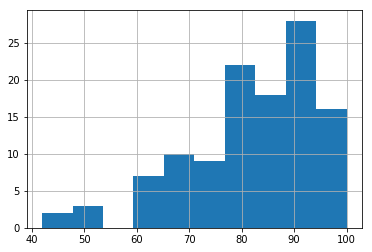

In [19]:
ME1.sequence_identity.hist() #most matches have >60% seq identity; pretty decent

# Annotation pipeline: deseq2

In [20]:
#okay, we want to pull up the Deseq 2 data with the expression info and transcript names
#and then match the species transcript names to the species diamond results to get gene names
dc_diamond.rename(columns={"dc_transcript":"transcript"}, inplace=True)

In [21]:
dm_diamond.rename(columns={"dm_transcript":"transcript"}, inplace=True)

In [22]:
gn_diamond.rename(columns={"gn_transcript":"transcript"}, inplace=True)

In [36]:
#merge the expression dfs with their dictionaries on "transcript"

celeste_deseq2 = celeste.merge(dc_diamond, on="transcript", how= "left")
celeste_deseq2.to_csv("celeste_deseq2_annotation.csv")

In [64]:
magna_deseq2 = magna.merge(dm_diamond, on="transcript", how= "left")
magna_deseq2.to_csv("magna_deseq2_annotation.csv")

In [65]:
natalis_deseq2 = natalis.merge(gn_diamond, on="transcript", how= "left")
natalis_deseq2.to_csv("natalis_deseq2_annotation.csv")

# WGCNA heatmap redux

In [3]:
#make heatmap of module-trait corrs after dropping rows corresponding with ME0
module_trait_corr = pd.read_csv("module_trait_corr_matrix.csv")
module_trait_corr.head()

,Unnamed: 0,celeste,magna,natalis,baseline,acute,extreme,recovery,antennal_gland,gill
0,ME2,0.094185,-0.142391,0.051602,0.020037,-0.036134,-0.017414,0.038380,0.839515,-0.839515
1,ME3,0.358035,0.129707,-0.522097,-0.025675,-0.093625,-0.049623,0.192893,0.667369,-0.667369
2,ME5,0.665169,-0.461252,-0.218280,0.042804,-0.075136,-0.066663,0.113614,0.477911,-0.477911
3,ME4,-0.484975,0.757237,-0.291440,-0.030978,-0.056050,0.004747,0.093516,0.424433,-0.424433
4,ME1,-0.281381,-0.313730,0.637028,0.053325,0.075463,0.029735,-0.180763,0.473273,-0.473273


In [4]:
#rename columns
module_trait_corr.rename(columns={"Unnamed: 0":"Module", "celeste": "T. celeste", "magna":"T. magna", 
                                  "natalis":"G. natalis", "baseline":"T0: Baseline", "acute":"T1: Acute",
                "extreme":"T3: Extreme", "recovery":"T4: Recovery", "antennal_gland": "Antennal Gland",
                                 "gill": "Posterior Gill"}, inplace=True)


In [5]:
#melt df
module_trait_corr = pd.melt(module_trait_corr, id_vars =['Module'])
module_trait_corr.head()

,Module,variable,value
0,ME2,T. celeste,0.094185
1,ME3,T. celeste,0.358035
2,ME5,T. celeste,0.665169
3,ME4,T. celeste,-0.484975
4,ME1,T. celeste,-0.281381


In [6]:
#rename variable column to "Trait" and value column to "Correlation"
module_trait_corr.rename(columns={"variable":"Trait", "value":"Correlation"}, inplace=True)

In [7]:
#do the same for the p-value table
module_trait_p = pd.read_csv("module_trait_p_value.csv")

#rename first column
module_trait_p.rename(columns={"Unnamed: 0":"Module", "celeste": "T. celeste", "magna":"T. magna", 
                                  "natalis":"G. natalis", "baseline":"T0: Baseline", "acute":"T1: Acute",
                "extreme":"T3: Extreme", "recovery":"T4: Recovery", "antennal_gland": "Antennal Gland",
                                 "gill": "Posterior Gill"}, inplace=True)

#melt df
module_trait_p = pd.melt(module_trait_p, id_vars =['Module'])

#rename variable column to "Trait" and value column to "Correlation"
module_trait_p.rename(columns={"variable":"Trait", "value":"pvalue"}, inplace=True)

In [8]:
module_trait_p.head()

,Module,Trait,pvalue
0,ME2,T. celeste,3.883721e-01
1,ME3,T. celeste,7.127270e-04
2,ME5,T. celeste,2.840000e-12
3,ME4,T. celeste,2.220000e-06
4,ME1,T. celeste,8.677906e-03


In [9]:
#merge dfs together on module and trait

module_trait_corr = pd.merge(module_trait_corr, module_trait_p, on= ["Module", "Trait"])
module_trait_corr.head()

,Module,Trait,Correlation,pvalue
0,ME2,T. celeste,0.094185,3.883721e-01
1,ME3,T. celeste,0.358035,7.127270e-04
2,ME5,T. celeste,0.665169,2.840000e-12
3,ME4,T. celeste,-0.484975,2.220000e-06
4,ME1,T. celeste,-0.281381,8.677906e-03


In [10]:
#label based on significance value
conditions = [
    (module_trait_corr["pvalue"] >= 0.05),
    (module_trait_corr["pvalue"] < 0.05) & (module_trait_corr["pvalue"] >= 0.01),
    (module_trait_corr["pvalue"] < 0.01) & (module_trait_corr["pvalue"] >= 0.001),
    (module_trait_corr["pvalue"] < 0.001)]
                
values = ['', "*", "**", "***"]
                            
module_trait_corr["significance"] = np.select(conditions, values)

In [11]:
from pandas.api.types import CategoricalDtype

In [12]:
#to make sure all cells are labeled with their appropriate values
#create custom sort order for modules
trait_order = CategoricalDtype(
    ['T. celeste', 'T. magna', 'G. natalis', 'T0: Baseline', 'T1: Acute', 'T3: Extreme', 'T4: Recovery', 'Antennal Gland',
    "Posterior Gill"], 
    ordered=True
)

In [13]:
#apply custom sort to trait column
module_trait_corr["Trait"] = module_trait_corr["Trait"].astype(trait_order)
module_trait_corr["Trait"]

0         T. celeste
1         T. celeste
2         T. celeste
3         T. celeste
4         T. celeste
5         T. celeste
6           T. magna
7           T. magna
8           T. magna
9           T. magna
10          T. magna
11          T. magna
12        G. natalis
13        G. natalis
14        G. natalis
15        G. natalis
16        G. natalis
17        G. natalis
18      T0: Baseline
19      T0: Baseline
20      T0: Baseline
21      T0: Baseline
22      T0: Baseline
23      T0: Baseline
24         T1: Acute
25         T1: Acute
26         T1: Acute
27         T1: Acute
28         T1: Acute
29         T1: Acute
30       T3: Extreme
31       T3: Extreme
32       T3: Extreme
33       T3: Extreme
34       T3: Extreme
35       T3: Extreme
36      T4: Recovery
37      T4: Recovery
38      T4: Recovery
39      T4: Recovery
40      T4: Recovery
41      T4: Recovery
42    Antennal Gland
43    Antennal Gland
44    Antennal Gland
45    Antennal Gland
46    Antennal Gland
47    Antenna

In [14]:
#then sort table by module then by trait
module_trait_corr = module_trait_corr.sort_values(by=["Module", "Trait"])
module_trait_corr

,Module,Trait,Correlation,pvalue,significance
4,ME1,T. celeste,-0.281381,8.677906e-03,**
10,ME1,T. magna,-0.313730,3.266421e-03,**
16,ME1,G. natalis,0.637028,4.290000e-11,***
22,ME1,T0: Baseline,0.053325,6.258117e-01,
28,ME1,T1: Acute,0.075463,4.898391e-01,
34,ME1,T3: Extreme,0.029735,7.857921e-01,
40,ME1,T4: Recovery,-0.180763,9.580434e-02,
46,ME1,Antennal Gland,0.473273,4.190000e-06,***
52,ME1,Posterior Gill,-0.473273,4.190000e-06,***
0,ME2,T. celeste,0.094185,3.883721e-01,


In [15]:
corr = ((np.array(module_trait_corr['Correlation'])).reshape(6,9))
sig = ((np.array(module_trait_corr['significance'])).reshape(6,9))

In [16]:
corr

array([[-0.28138084, -0.31372981,  0.6370279 ,  0.05332541,  0.07546348,
         0.02973529, -0.18076251,  0.47327319, -0.47327319],
       [ 0.09418488, -0.14239147,  0.05160207,  0.0200373 , -0.03613363,
        -0.01741388,  0.03838035,  0.83951524, -0.83951524],
       [ 0.35803525,  0.1297075 , -0.52209742, -0.02567462, -0.09362541,
        -0.0496232 ,  0.19289312,  0.66736867, -0.66736867],
       [-0.48497465,  0.7572372 , -0.29143965, -0.03097792, -0.05604989,
         0.00474733,  0.09351621,  0.42443278, -0.42443278],
       [ 0.66516916, -0.46125223, -0.21828003,  0.04280417, -0.07513641,
        -0.06666337,  0.11361436,  0.47791085, -0.47791085],
       [-0.53046163,  0.20066014,  0.3530314 , -0.01650612,  0.00778896,
         0.09168051, -0.09575914,  0.64150328, -0.64150328]])

In [17]:
sig

array([['**', '**', '***', '', '', '', '', '***', '***'],
       ['', '', '', '', '', '', '', '***', '***'],
       ['***', '', '***', '', '', '', '', '***', '***'],
       ['***', '***', '**', '', '', '', '', '***', '***'],
       ['***', '***', '*', '', '', '', '', '***', '***'],
       ['***', '', '***', '', '', '', '', '***', '***']], dtype=object)

In [18]:
result = module_trait_corr.pivot(index='Module', columns='Trait', values='Correlation')
result = result[["T. celeste", "T. magna", "G. natalis", "T0: Baseline", "T1: Acute",
                "T3: Extreme", "T4: Recovery", "Posterior Gill", "Antennal Gland"]]
result = result.reindex(["ME1", "ME2", "ME3", "ME4", "ME5", "ME6"])
result

Trait,T. celeste,T. magna,G. natalis,T0: Baseline,T1: Acute,T3: Extreme,T4: Recovery,Posterior Gill,Antennal Gland
Module,,,,,,,,,
ME1,-0.281381,-0.313730,0.637028,0.053325,0.075463,0.029735,-0.180763,-0.473273,0.473273
ME2,0.094185,-0.142391,0.051602,0.020037,-0.036134,-0.017414,0.038380,-0.839515,0.839515
ME3,0.358035,0.129707,-0.522097,-0.025675,-0.093625,-0.049623,0.192893,-0.667369,0.667369
ME4,-0.484975,0.757237,-0.291440,-0.030978,-0.056050,0.004747,0.093516,-0.424433,0.424433
ME5,0.665169,-0.461252,-0.218280,0.042804,-0.075136,-0.066663,0.113614,-0.477911,0.477911
ME6,-0.530462,0.200660,0.353031,-0.016506,0.007789,0.091681,-0.095759,-0.641503,0.641503


In [19]:
labels = (np.asarray(["{0:.2f}\n{1}".format(corr,sig)
                     for corr, sig in zip(corr.flatten(),
                                         sig.flatten())])
         ).reshape(6,9)


In [20]:
labels

array([['-0.28\n**', '-0.31\n**', '0.64\n***', '0.05\n', '0.08\n',
        '0.03\n', '-0.18\n', '0.47\n***', '-0.47\n***'],
       ['0.09\n', '-0.14\n', '0.05\n', '0.02\n', '-0.04\n', '-0.02\n',
        '0.04\n', '0.84\n***', '-0.84\n***'],
       ['0.36\n***', '0.13\n', '-0.52\n***', '-0.03\n', '-0.09\n',
        '-0.05\n', '0.19\n', '0.67\n***', '-0.67\n***'],
       ['-0.48\n***', '0.76\n***', '-0.29\n**', '-0.03\n', '-0.06\n',
        '0.00\n', '0.09\n', '0.42\n***', '-0.42\n***'],
       ['0.67\n***', '-0.46\n***', '-0.22\n*', '0.04\n', '-0.08\n',
        '-0.07\n', '0.11\n', '0.48\n***', '-0.48\n***'],
       ['-0.53\n***', '0.20\n', '0.35\n***', '-0.02\n', '0.01\n', '0.09\n',
        '-0.10\n', '0.64\n***', '-0.64\n***']],
      dtype='<U9')

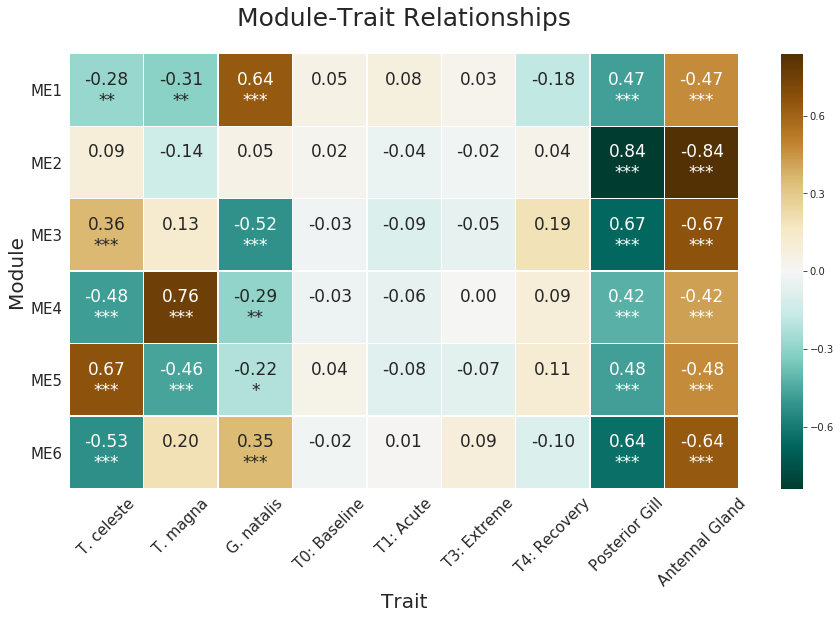

In [29]:
#define the plot
fig, ax = plt.subplots(figsize=(15,8))

#add title to the heatmap
title = "Module-Trait Relationships"
yticks = result.index

#set the font size and the distance of the title from the plot
plt.title(title, fontsize=25)
plt.yticks(rotation=0)
plt.xlabel('Trait', fontsize=20)
plt.ylabel('Module', fontsize=20)
ttl = ax.title
ttl.set_position([0.5, 1.05])

#rotate labels on the y-axis
g = sns.heatmap(result, annot=labels, fmt="", cmap="BrBG_r", linewidths=0.30, ax=ax, yticklabels=yticks, annot_kws={"size": 17})
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 15)
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 15)

plt.show()

# Upset diagram for comparisons between sets

In [228]:
!pip install upsetplot
import upsetplot
from upsetplot import from_memberships
from upsetplot import plot
from matplotlib import pyplot

  Running setup.py bdist_wheel for upsetplot ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/7f/4a/cb/c20e6ab360089c7efaa83a9dd58ff6910dae33676626542dce
Successfully built upsetplot


In [229]:
gecarcinid_orthos = from_memberships(
    [[],
     ['G. natalis'],
     ['T. magna'],
     ['T. magna', 'G. natalis'],
     ['T. celeste'],
     ['T. celeste', 'G. natalis'],
     ['T. celeste', 'T. magna'],
     ['T. celeste', 'T. magna', 'G. natalis'],
    ],
    data=[0, 27, 14, 1073, 17, 2368, 4646, 9516]
)
gecarcinid_orthos

G. natalis  T. celeste  T. magna
False       False       False          0
True        False       False         27
False       False       True          14
True        False       True        1073
False       True        False         17
True        True        False       2368
False       True        True        4646
True        True        True        9516
dtype: int64

In [230]:
from upsetplot import plot
from matplotlib import pyplot

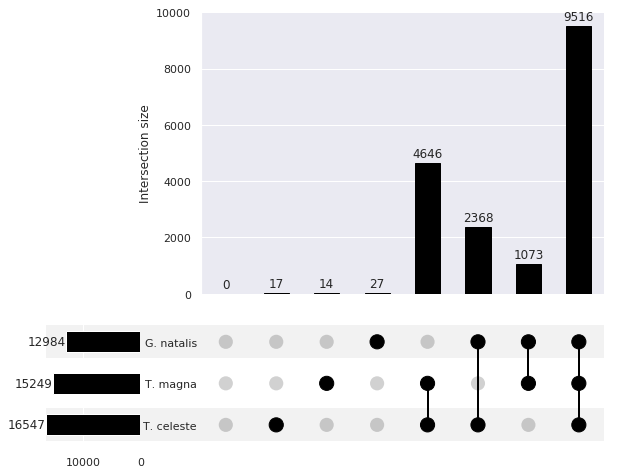

In [231]:
fig = plt.figure(figsize=(10, 8))
plot(gecarcinid_orthos, fig=fig, show_counts=True, element_size = None)
pyplot.show()


# Candidate gene approach

In [ ]:
# I was never able to get the code below to run to completion, it required a lot of computing power and time
# so there aren't any results from the code below included in the paper.
# but feel free to play around with it if you think it would be helpful!

In [2]:
dc_diamond = pd.read_csv("DC_matches.tsv", sep='\t', header= None)
dc_diamond = dc_diamond.rename(columns = {0: 'dc_transcript', 1: "target_accession",
                                         2: "sequence_identity", 3: "length",
                                         4: "mismatches", 5: "gap_openings",
                                         6: "Query_start", 7: "query_end",
                                         8: "Target_start", 9: "Target_end",
                                         10: 'e-value', 11: "bit_score"})

#select the highest hit for all transcripts by e-value; drop the rest
dc_diamond.sort_values(by='sequence_identity', ascending=False, inplace=True)
dc_diamond = dc_diamond.drop_duplicates(subset = 'dc_transcript', keep='first')

In [3]:
#drop ".1" from all entries to help with Batch Entrez search
#.1 I guess signifies the version number, but the straight up accession number doesnt have a ".anything"
dc_diamond['entrez_accession'] = dc_diamond['target_accession'].str.split('.').str[0]

In [4]:
#create a list of the top hit accession numbers for each transcript in the transcriptome
dc_list = dc_diamond["entrez_accession"].tolist()

In [5]:
len(dc_list) #how many entries are in this list now? 73,770 genes!

73770

In [6]:
#create a function that will fetch Genbank descriptions for every accession number in our list
def fetch_descriptions(accession_list):
    protein_descriptions = {}

    for entry in accession_list:
        result_handle = Entrez.efetch(db='protein', id=entry, rettype="gb", retmode="text")
        record = SeqIO.read(result_handle, "genbank")
        protein_descriptions[entry] = record.description
        #print([entry, record.description]) #just for testing purposes to make sure it's pulling what I want

    return protein_descriptions

In [ ]:
#save the output 
dc_entrez = fetch_descriptions(dc_list)

In [ ]:
#convert to df and then save to file

dc_entrez = pd.DataFrame(list(dc_entrez.items()), columns = ['accession_number','description'])
dc_entrez.to_csv("dc_accessions_descriptions.csv")

In [5]:
#write all accession numbers to a text file with each accession on a new line
#with open('all_dc_accessions.txt', 'w') as f:
    #for text in dc_diamond["entrez_accession"].tolist():
        #f.write(text + '\n')

In [6]:
dm_diamond = pd.read_csv("DM_matches.tsv", sep='\t', header= None)
dm_diamond = dm_diamond.rename(columns = {0: 'dm_transcript', 1: "target_accession",
                                         2: "sequence_identity", 3: "length",
                                         4: "mismatches", 5: "gap_openings",
                                         6: "Query_start", 7: "query_end",
                                         8: "Target_start", 9: "Target_end",
                                         10: 'e-value', 11: "bit_score"})

#drop ".1" from all entries to help with Batch Entrez search
#.1 I guess signifies the version number, but the straight up accession number doesnt have a . anything
dm_diamond['entrez_accession'] = dm_diamond['target_accession'].str.split('.').str[0]

#write all accession numbers to a text file with each accession on a new line
with open('all_dm_accessions.txt', 'w') as f:
    for text in dm_diamond["entrez_accession"].tolist():
        f.write(text + '\n')

In [7]:
gn_diamond = pd.read_csv("GN_matches.tsv", sep='\t', header= None)
gn_diamond = gn_diamond.rename(columns = {0: 'gn_transcript', 1: "target_accession",
                                         2: "sequence_identity", 3: "length",
                                         4: "mismatches", 5: "gap_openings",
                                         6: "Query_start", 7: "query_end",
                                         8: "Target_start", 9: "Target_end",
                                         10: 'e-value', 11: "bit_score"})

#drop ".1" from all entries to help with Batch Entrez search
#.1 I guess signifies the version number, but the straight up accession number doesnt have a . anything
gn_diamond['entrez_accession'] = gn_diamond['target_accession'].str.split('.').str[0]

#write all accession numbers to a text file with each accession on a new line
with open('all_gn_accessions.txt', 'w') as f:
    for text in gn_diamond["entrez_accession"].tolist():
        f.write(text + '\n')

In [8]:
len(dc_diamond["entrez_accession"])

1521719